# Evaluation Project 9 : Insurance Claim Fraud Detection

**Project Description:**

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.



I**Independent Variables:**

1.	months_as_customer: Number of months of patronage
2.	age: the length of time a customer has lived or a thing has existed
3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
6.	policy_csl: is basically Combined Single Limit
7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
10.	insured_zip: It is the zip code where the insurance was made
11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
12.	insured_education_level: This refers to the Level of education of the customer
13.	insured_occupation: This refers Occupation of the customer
14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
16.	capital-gains: This refers to profit accrued due to insurance premium
17.	capital-loss: This refers to the losses incurred due to insurance claims
18.	incident_date: This refers to the date which claims where made by customers
19.	incident_type: This refers to the type of claim/vehicle damage made by customer
20.	collision_type: This refers to the area of damage on the vehicle
21.	incident_severity: This refers to the extent/level of damage
22.	authorities_contacted: This refers to the government agencies that were contacted after damage
23.	incident_state: This refers to the state at which the accident happened
24.	incident_city: This refers to the city at which the accident happened
25.	1ncident_location: This refers to the location at which the accident happened
26.	incident_hour_of_the_day: The period of the day which accident took place
27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident
28.	property_damage: This refers to whether property was damaged or not
29.	bodily_injuries: This refers to injuries sustained
30.	witnesses: This refers to the number of witnesses involved
31.	police_report_available: This refers to whether the report on damage was documented or not
32.	total_claim_amount: This refers to the financial implications involved in claims
33.	injury_claim: This refers to physical injuries sustained
34.	property_claim: This refers to property damages during incident
35.	vehicle_claim: This refers to property damages during incident
36.	auto_make: This refers to the make of the vehicle
37.	auto_model: This refers to the model of the vehicle
38.	auto_year: This refers to the year which the vehicle was manufactured
39.	_c39:
40.	fraud_reported


In [1]:
# Importing Necessary Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler, LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Dataset:

fraud=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [3]:
# To display top 5 rows:

fraud.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
# To display total number of rows and columns:

fraud.shape

(1000, 40)

**There are 1000 rows and 40 columns present in this dataset.**

In [5]:
# To display all the columns :
fraud.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
# Checking datatype of all the columns :
fraud.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

**There are int64 , object and float64 datatypes are present.**

In [7]:
# To get the descriptive Statistics of continuous data:
fraud.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [8]:
# To get the brief information of data:

fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [9]:
# Finding the null values :
fraud.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

**There is only one column , where all the values are null values . We have to handle this columm.**

**As we have to predict the Target variable , so let's start working on.**

In [10]:
# To find the unique values in Target Variable:
fraud['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

**There are only two values in the Target Variable.**

In [11]:
# To display the value count in Target Variable:
fraud['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [12]:
# Checking unique values in all the columns :
fraud.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

# Data Cleaning:

In [13]:
# To display the value count in _c39:
fraud['_c39'].value_counts()

Series([], Name: _c39, dtype: int64)

In [14]:
# To display the unique value in _c39:
fraud['_c39'].unique()

array([nan])

**As all the values are null values , so let's drop this column.**

In [15]:
fraud=fraud.drop(columns="_c39", axis=1)

In [16]:
#Checking values of column 'collision_type'
fraud['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [17]:
#checking repeated values in "collision_type" column through mode
print( fraud["collision_type"].mode())

0    Rear Collision
Name: collision_type, dtype: object


In [18]:
#Filling Null Values of "collision_type" column in dataset by mode value
fraud["collision_type"].fillna(fraud["collision_type"].mode(), inplace=True)

In [19]:
# Checking values of column 'property_damage'
fraud['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [20]:
#checking repeated values in "property_damage" column through mode
print( fraud["property_damage"].mode())

0    ?
Name: property_damage, dtype: object


In [21]:
#converrting ? values to Null Value, so that we can handle it.
fraud.replace({'?': np.nan}, inplace=True)

In [22]:
#checking repeated values in "property_damage" column through mode
print( fraud["property_damage"].mode())

0    NO
Name: property_damage, dtype: object


In [23]:
#Filling Null Values of "property_damage" column in dataset by mode value
fraud["property_damage"].fillna(fraud["property_damage"].mode(), inplace=True)

In [24]:
##Filling Null Values of "property_damage" column in dataset by mode value
fraud["property_damage"].fillna(fraud["property_damage"].mode(), inplace=True)

In [25]:
#checking repeated values in "police_report_available" column through mode
print( fraud["police_report_available"].mode())

0    NO
Name: police_report_available, dtype: object


In [26]:
#Filling Null Values of "police_report_available" column in dataset by mode value
fraud["police_report_available"].fillna(fraud["police_report_available"].mode(), inplace=True)

In [27]:
#Checking values of column 'umbrella_limit'
fraud['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

In [29]:
#checking mean value of column 'umbrella_limit'
print(fraud['umbrella_limit'].mean())    

1101000.0


In [30]:
#replacing 0 values of column 'umbrella_limit' with mean value "1101000.0"
fraud['umbrella_limit'] = fraud['umbrella_limit'].replace(0, 1101000.0)    

In [31]:
#checking again all values of column 'umbrella_limit'
fraud['umbrella_limit'].value_counts()

 1101000     798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

In [32]:
#Checking values of column 'capital-gains'
fraud['capital-gains'].value_counts()

0        508
46300      5
51500      4
68500      4
55600      3
        ... 
36700      1
54900      1
69200      1
48800      1
50300      1
Name: capital-gains, Length: 338, dtype: int64

In [33]:
#checking mean value of column 'capital-gains'
print(fraud['capital-gains'].mean())  

25126.1


In [34]:
#replacing 0 values of column 'capital-gains' with mean value "25126.1"
fraud['capital-gains'] = fraud['capital-gains'].replace(0, 25126.1)   

In [35]:
#checking again all value
fraud['capital-gains'].value_counts()

25126.1    508
46300.0      5
51500.0      4
68500.0      4
55600.0      3
          ... 
36700.0      1
54900.0      1
69200.0      1
48800.0      1
50300.0      1
Name: capital-gains, Length: 338, dtype: int64

In [36]:
#Checking values of column 'capital-loss'
fraud['capital-loss'].value_counts()

 0        475
-31700      5
-53700      5
-50300      5
-45300      4
         ... 
-12100      1
-17000      1
-72900      1
-19700      1
-82100      1
Name: capital-loss, Length: 354, dtype: int64

In [37]:
#checking mean value of column 'capital-loss'
print(fraud['capital-loss'].mean())  

-26793.7


In [38]:
#replacing 0 values of column 'capital-loss' with mean value "-26793.7"
fraud['capital-loss'] = fraud['capital-loss'].replace(0, -26793.7)   

In [39]:
#checking again all values
fraud['capital-loss'].value_counts()

-26793.7    475
-31700.0      5
-53700.0      5
-50300.0      5
-45300.0      4
           ... 
-12100.0      1
-17000.0      1
-72900.0      1
-19700.0      1
-82100.0      1
Name: capital-loss, Length: 354, dtype: int64

In [40]:
#Checking values of column 'injury_claim'
fraud['injury_claim'].value_counts()

0        25
640       7
480       7
660       5
580       5
         ..
14840     1
6580      1
11820     1
16650     1
7500      1
Name: injury_claim, Length: 638, dtype: int64

In [41]:
#checking mean value of column 'injury_claim'
print(fraud['injury_claim'].mean())  

7433.42


In [42]:
#replacing 0 values of column 'injury_claim' with mean value "7433.42"
fraud['injury_claim'] = fraud['injury_claim'].replace(0, 7433.42)   

In [43]:
#checking again all value
fraud['injury_claim'].value_counts()

7433.42     25
640.00       7
480.00       7
660.00       5
580.00       5
            ..
14840.00     1
6580.00      1
11820.00     1
16650.00     1
7500.00      1
Name: injury_claim, Length: 638, dtype: int64

In [44]:
#Checking values of column 'property_claim'
fraud['property_claim'].value_counts()

0        19
860       6
480       5
660       5
10000     5
         ..
3590      1
6480      1
4580      1
4920      1
7500      1
Name: property_claim, Length: 626, dtype: int64

In [45]:
#checking mean value of column 'umbrella_limit'
print(fraud['property_claim'].mean())  

7399.57


In [46]:
#replacing 0 values of column 'property_claim' with mean value "7399.57"
fraud['property_claim'] = fraud['property_claim'].replace(0, 7399.57)   

In [47]:
#checking again all values
fraud['property_claim'].value_counts()

7399.57     19
860.00       6
480.00       5
660.00       5
10000.00     5
            ..
3590.00      1
6480.00      1
4580.00      1
4920.00      1
7500.00      1
Name: property_claim, Length: 626, dtype: int64

In [49]:
print(fraud["policy_bind_date"].value_counts())

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64


In [50]:
#converting datatype from object to datetime 
fraud['policy_bind_date']=pd.to_datetime(fraud['policy_bind_date'])

In [51]:
#mapping year values from 'policy_bind_date' to 'Policy_Bind_Year' column in main dataframe
fraud['Policy_Bind_Year']=fraud['policy_bind_date'].apply(lambda y:y.year)

In [52]:
fraud.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'Policy_Bind_Year'],
      dtype='object')

In [53]:
#dropping 'policy_bind_date' column as we have now no need of it.
fraud.drop(columns = ['policy_bind_date'],inplace = True)

In [54]:
# To verify:
fraud.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy_Bind_Year
0,328,48,521585,OH,250/500,1000,1406.91,1101000,466132,MALE,...,YES,71610,6510.0,13020.0,52080,Saab,92x,2004,Y,2014
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,NaN,5070,780.0,780.0,3510,Mercedes,E400,2007,Y,2006
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700.0,3850.0,23100,Dodge,RAM,2007,N,2000
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,1990
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300.0,650.0,4550,Accura,RSX,2009,N,2014


In [55]:
#Extracting 'Age' of policy bind from Policy_Bind_Year
fraud['Policy_Bind_Age'] = fraud['Policy_Bind_Year'].apply(lambda y: 2016 - y)

In [56]:
fraud.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'Policy_Bind_Year',
       'Policy_Bind_Age'],
      dtype='object')

In [57]:
#dropping 'Policy_Bind_Year' column as we have now no need of it.
fraud.drop(columns = ['Policy_Bind_Year'],inplace = True)

In [58]:
# To verify, if the null values treated or not:
fraud.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses           

In [59]:
#converting Datatype from object to Datetime
fraud['incident_date']=pd.to_datetime(fraud['incident_date'])

In [60]:
fraud['Incident_Month'] = fraud['incident_date'].apply(lambda m:m.month)

In [61]:
#we will dropm column "incident_date" after extracting month
fraud.drop(columns=['incident_date'],inplace=True)

# Data Visualization:

**Univariate Analysis:**

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


<AxesSubplot:xlabel='policy_state', ylabel='count'>

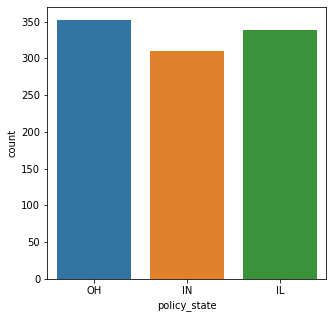

In [62]:
#Count Plot for "policy_state" column
print(fraud["policy_state"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("policy_state",data=fraud)

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


<AxesSubplot:xlabel='policy_csl', ylabel='count'>

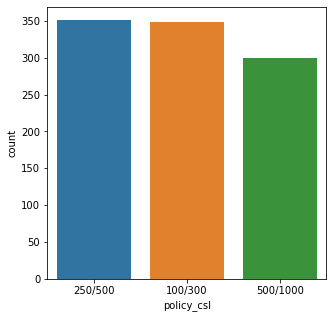

In [63]:
#Count Plot for "policy_csl" column
print(fraud["policy_csl"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("policy_csl",data=fraud)

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


<AxesSubplot:xlabel='insured_sex', ylabel='count'>

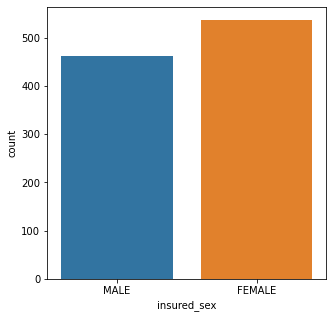

In [64]:
#Count Plot for "insured_sex" column
print(fraud["insured_sex"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("insured_sex",data=fraud)

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

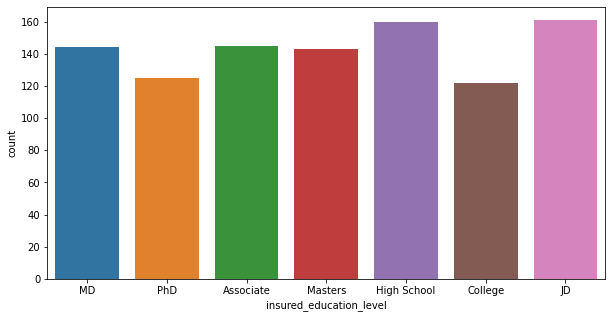

In [65]:
#Count Plot for "insured_education_level" column
print(fraud["insured_education_level"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot("insured_education_level",data=fraud)

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

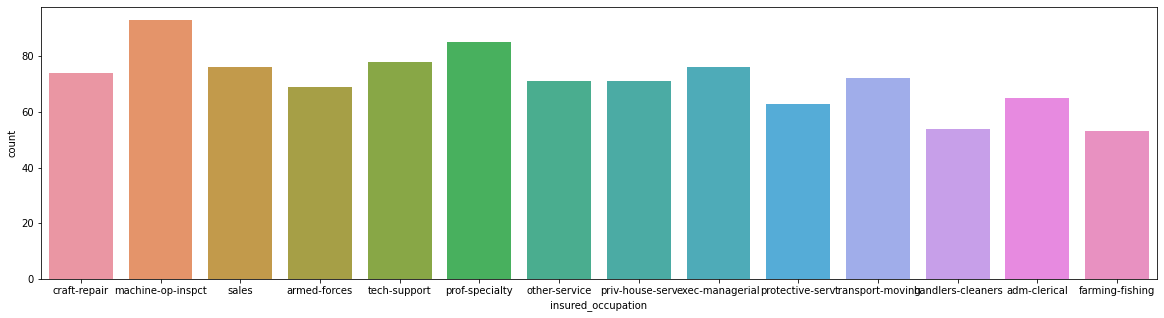

In [66]:
#Count Plot for "insured_occupation" column
print(fraud["insured_occupation"].value_counts())
plt.figure(figsize=(20,5))
sns.countplot("insured_occupation",data=fraud)

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

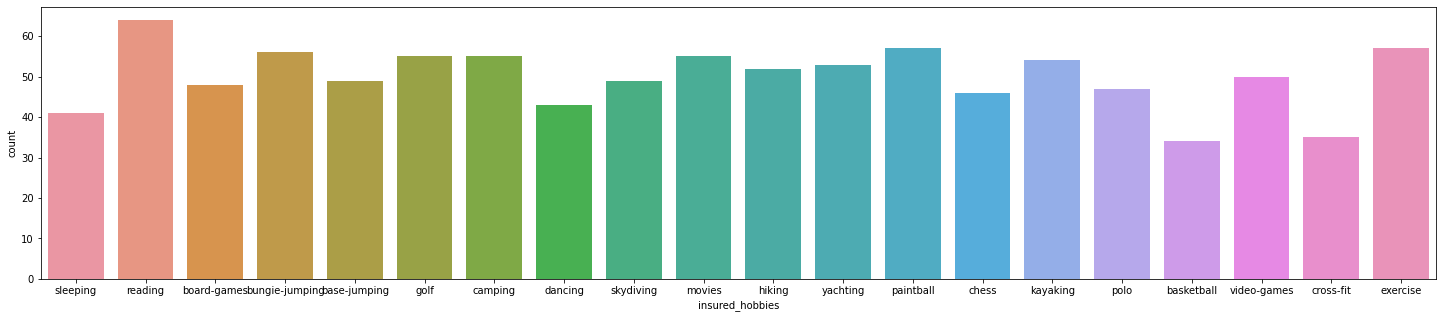

In [67]:
#Count Plot for "insured_hobbies" column
print(fraud["insured_hobbies"].value_counts())
plt.figure(figsize=(25,5))
sns.countplot("insured_hobbies",data=fraud)

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

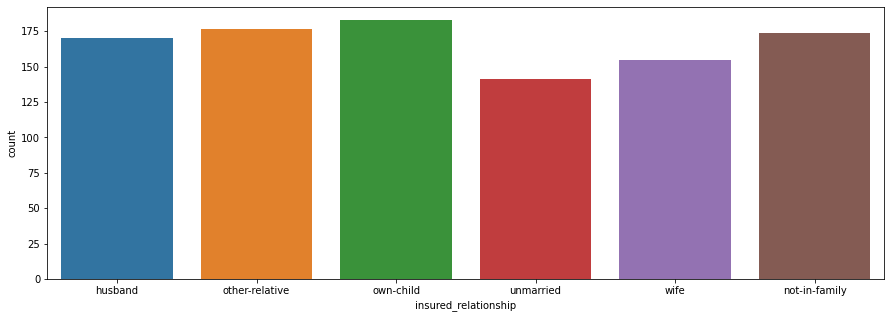

In [68]:
#Count Plot for "insured_relationship" column
print(fraud["insured_relationship"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot("insured_relationship",data=fraud)

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


<AxesSubplot:xlabel='incident_type', ylabel='count'>

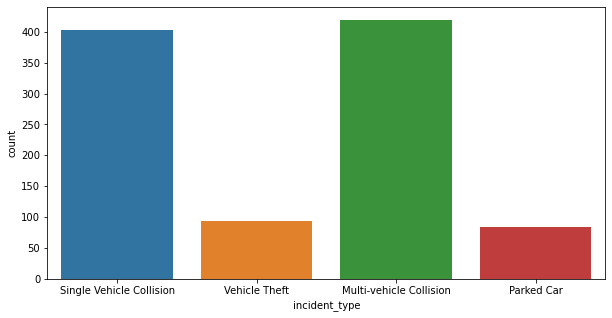

In [69]:
#Count Plot for "incident_type" column
print(fraud["incident_type"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot("incident_type",data=fraud)

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


<AxesSubplot:xlabel='collision_type', ylabel='count'>

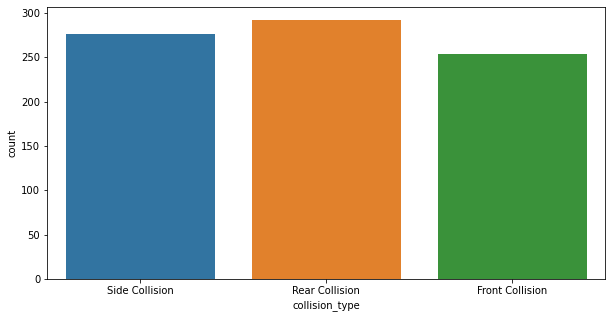

In [70]:
#Count Plot for "collision_type" column
print(fraud["collision_type"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot("collision_type",data=fraud)

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


<AxesSubplot:xlabel='incident_severity', ylabel='count'>

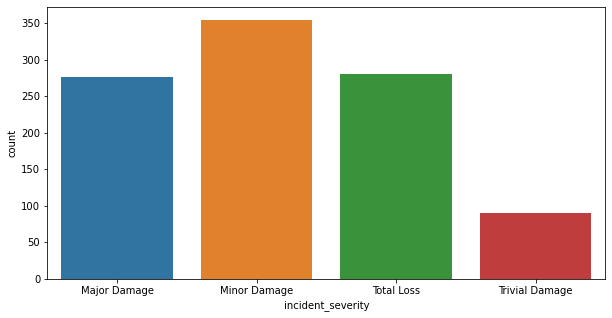

In [71]:
#Count Plot for "incident_severity" column
print(fraud["incident_severity"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot("incident_severity",data=fraud)

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

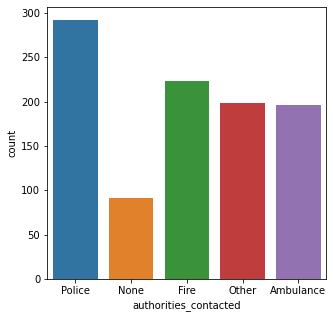

In [72]:
#Count Plot for "authorities_contacted" column
print(fraud["authorities_contacted"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("authorities_contacted",data=fraud)

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


<AxesSubplot:xlabel='incident_state', ylabel='count'>

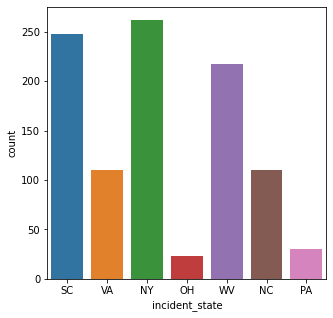

In [73]:
#Count Plot for "incident_state" column
print(fraud["incident_state"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("incident_state",data=fraud) 

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


<AxesSubplot:xlabel='incident_city', ylabel='count'>

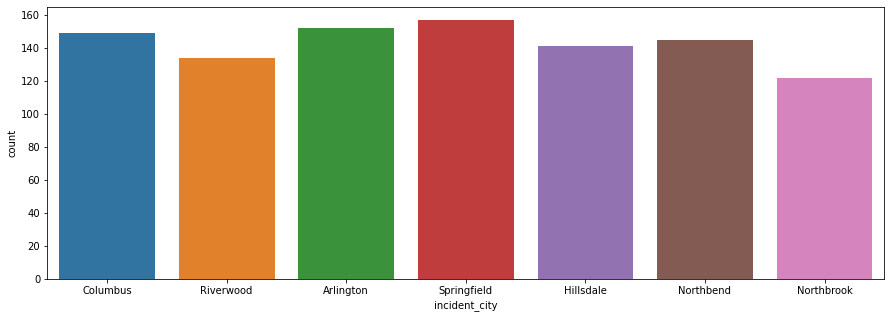

In [75]:
#Count Plot for "incident_city" column
print(fraud["incident_city"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot("incident_city",data=fraud)

NO     338
YES    302
Name: property_damage, dtype: int64


<AxesSubplot:xlabel='property_damage', ylabel='count'>

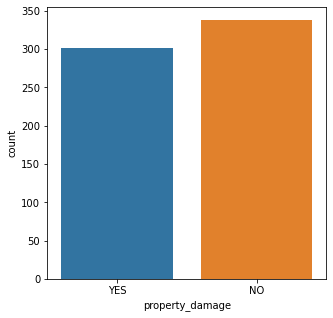

In [78]:
#Count Plot for "property_damage" column
print(fraud["property_damage"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("property_damage",data=fraud)

NO     343
YES    314
Name: police_report_available, dtype: int64


<AxesSubplot:xlabel='police_report_available', ylabel='count'>

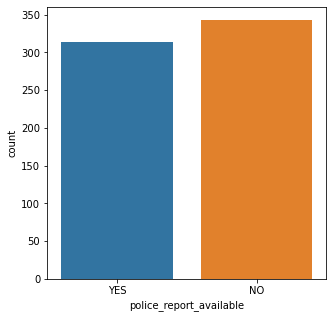

In [79]:
#Count Plot for "police_report_available" column
print(fraud["police_report_available"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("police_report_available",data=fraud)

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


<AxesSubplot:xlabel='auto_make', ylabel='count'>

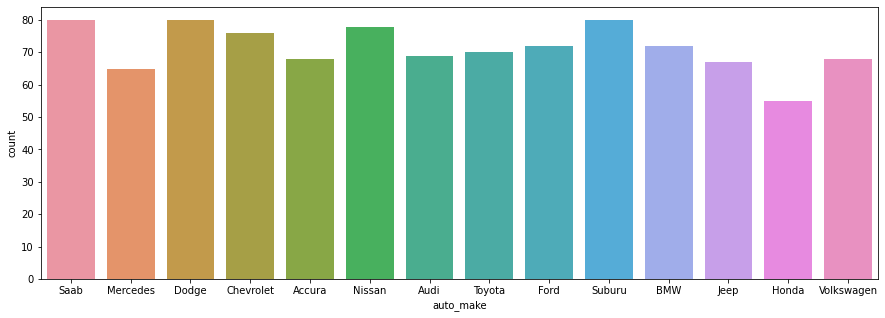

In [80]:
#Count Plot for "auto_make" column
print(fraud["auto_make"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot("auto_make",data=fraud)

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


<AxesSubplot:xlabel='auto_model', ylabel='count'>

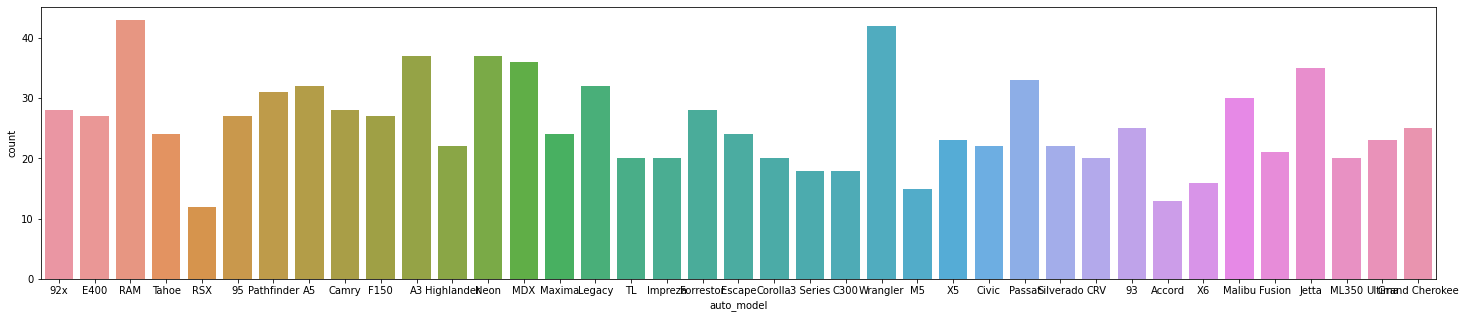

In [81]:
#Count Plot for "auto_model" column
print(fraud["auto_model"].value_counts())
plt.figure(figsize=(25,5))
sns.countplot("auto_model",data=fraud)

N    753
Y    247
Name: fraud_reported, dtype: int64


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

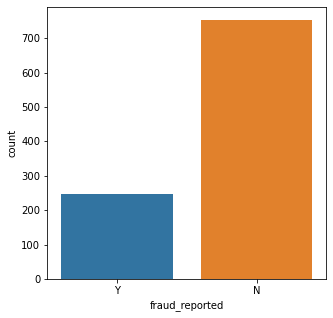

In [82]:
#Count Plot for "fraud_reported" column
print(fraud["fraud_reported"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("fraud_reported",data=fraud)        

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


<AxesSubplot:xlabel='months_as_customer', ylabel='Count'>

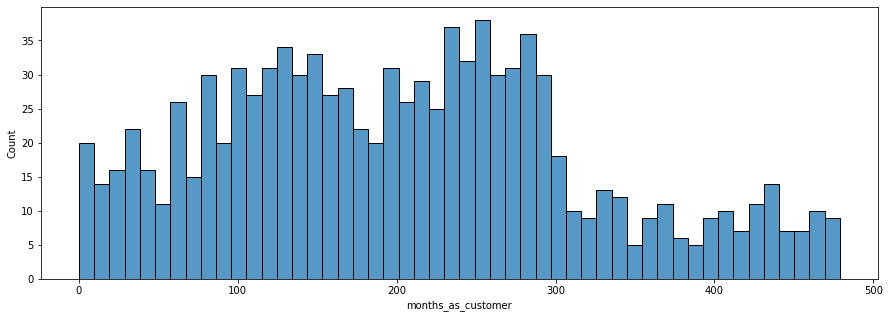

In [84]:
#HistPlot for "months_as_customer" column
print(fraud["months_as_customer"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="months_as_customer",data=fraud,bins=50)

43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


<AxesSubplot:xlabel='age', ylabel='Count'>

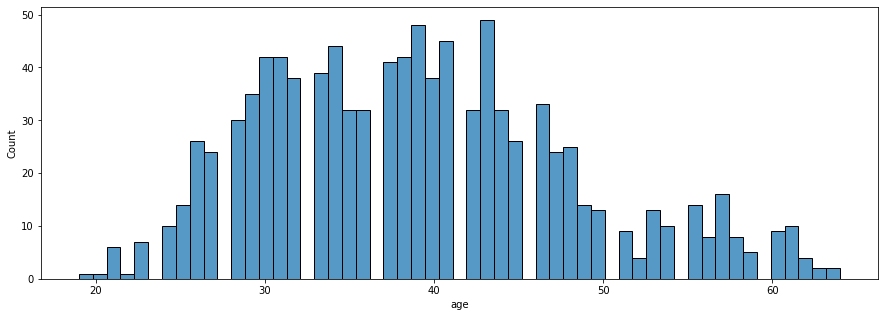

In [85]:
#HistPlot for "age" column
print(fraud["age"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="age",data=fraud,bins=55)

521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64


<AxesSubplot:xlabel='policy_number', ylabel='Count'>

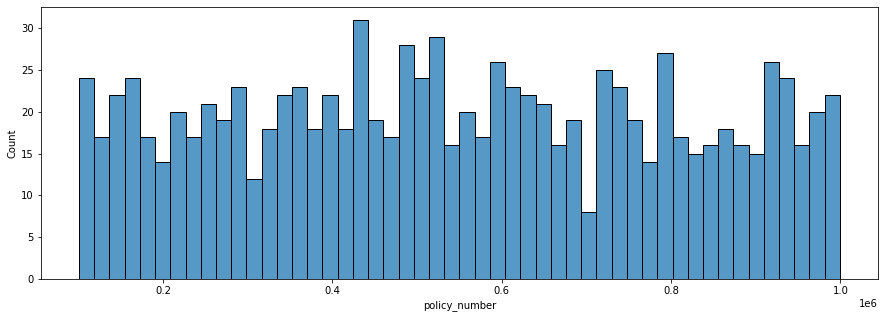

In [86]:
#HistPlot for "policy_number" column
print(fraud["policy_number"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="policy_number",data=fraud,bins=50)

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64


<AxesSubplot:xlabel='policy_deductable', ylabel='Count'>

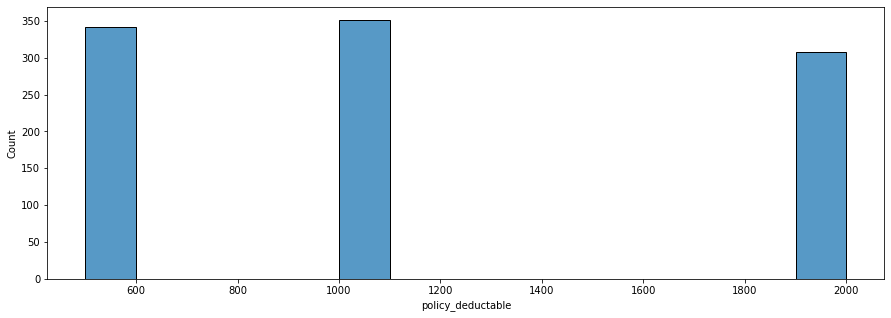

In [87]:
#HistPlot for "policy_deductable" column
print(fraud["policy_deductable"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="policy_deductable",data=fraud,bins=15)

1558.29    2
1215.36    2
1362.87    2
1073.83    2
1389.13    2
          ..
1085.03    1
1437.33    1
988.29     1
1238.89    1
766.19     1
Name: policy_annual_premium, Length: 991, dtype: int64


<AxesSubplot:xlabel='policy_annual_premium', ylabel='Count'>

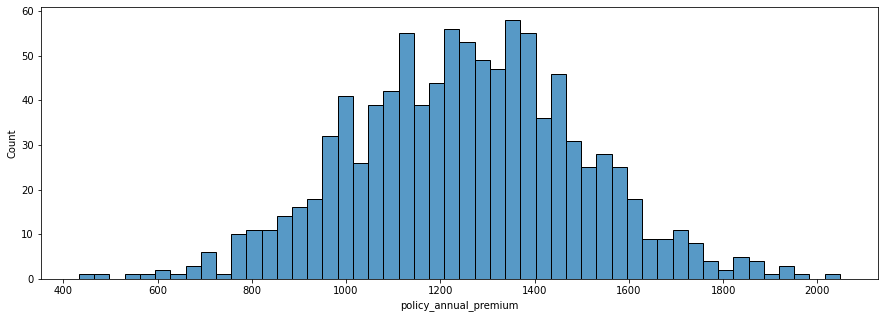

In [88]:
#HistPlot for "policy_annual_premium" column
print(fraud["policy_annual_premium"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="policy_annual_premium",data=fraud,bins=50)

 1101000     798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64


<AxesSubplot:xlabel='umbrella_limit', ylabel='Count'>

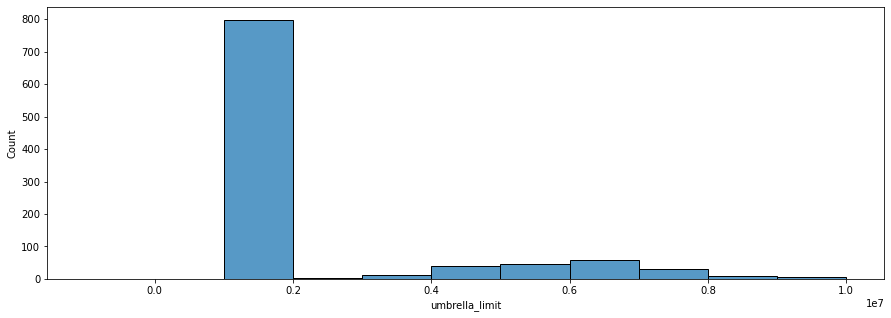

In [89]:
#HistPlot for "umbrella_limit" column
print(fraud["umbrella_limit"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="umbrella_limit",data=fraud,bins=11)

477695    2
469429    2
446895    2
431202    2
456602    2
         ..
476303    1
450339    1
476502    1
600561    1
612260    1
Name: insured_zip, Length: 995, dtype: int64


<AxesSubplot:xlabel='insured_zip', ylabel='Count'>

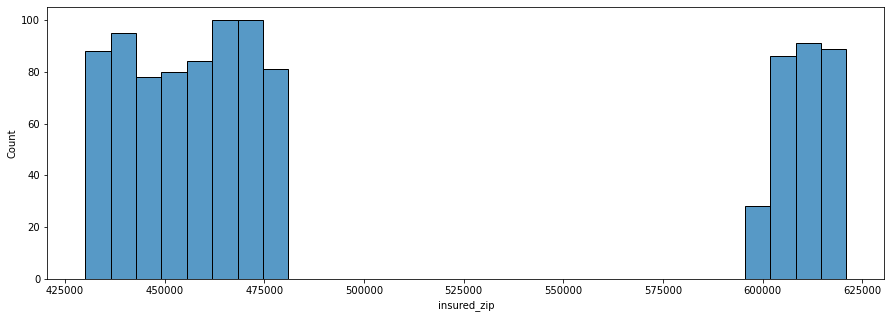

In [90]:
#HistPlot for "insured_zip" column
print(fraud["insured_zip"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="insured_zip",data=fraud,bins=30)

25126.1    508
46300.0      5
51500.0      4
68500.0      4
55600.0      3
          ... 
36700.0      1
54900.0      1
69200.0      1
48800.0      1
50300.0      1
Name: capital-gains, Length: 338, dtype: int64


<AxesSubplot:xlabel='capital-gains', ylabel='Count'>

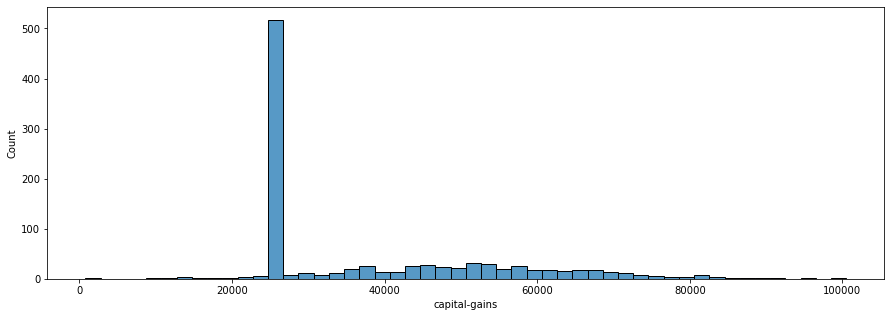

In [91]:
#HistPlot for "capital-gains" column
print(fraud["capital-gains"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="capital-gains",data=fraud,bins=50)

25126.1    508
46300.0      5
51500.0      4
68500.0      4
55600.0      3
          ... 
36700.0      1
54900.0      1
69200.0      1
48800.0      1
50300.0      1
Name: capital-gains, Length: 338, dtype: int64


<AxesSubplot:xlabel='capital-gains', ylabel='Count'>

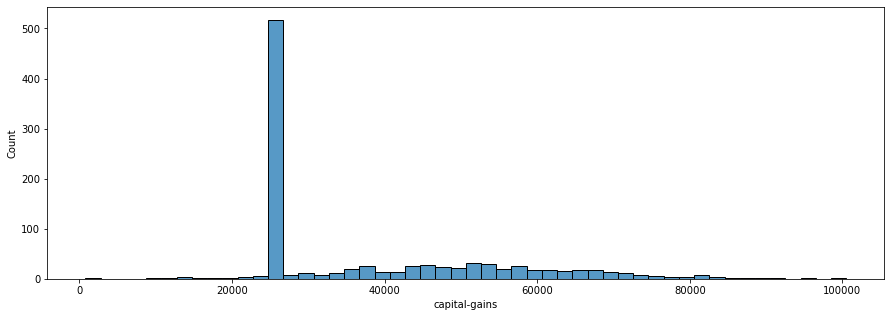

In [92]:
#HistPlot for "capital-gains" column
print(fraud["capital-gains"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="capital-gains",data=fraud,bins=50)

17    54
3     53
0     52
23    51
16    49
13    46
10    46
4     46
6     44
9     43
14    43
21    42
18    41
12    40
19    40
7     40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64


<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='Count'>

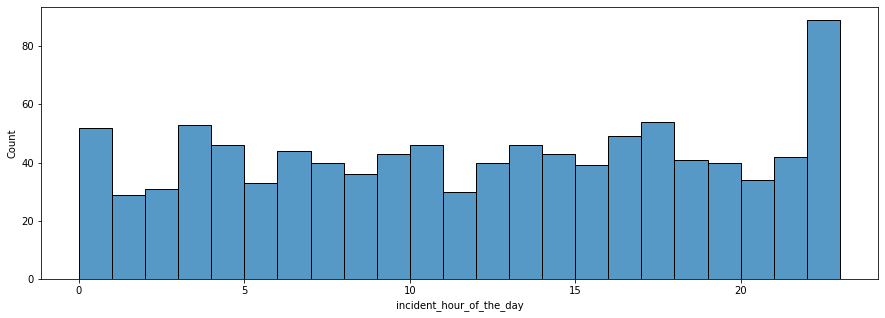

In [93]:
#HistPlot for "incident_hour_of_the_day" column
print(fraud["incident_hour_of_the_day"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="incident_hour_of_the_day",data=fraud,bins=23)

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64


<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='Count'>

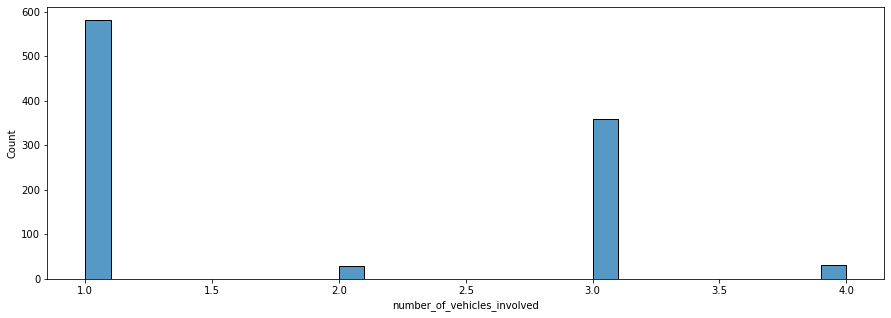

In [94]:
#HistPlot for "number_of_vehicles_involved" column
print(fraud["number_of_vehicles_involved"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="number_of_vehicles_involved",data=fraud,bins=30)

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64


<AxesSubplot:xlabel='bodily_injuries', ylabel='Count'>

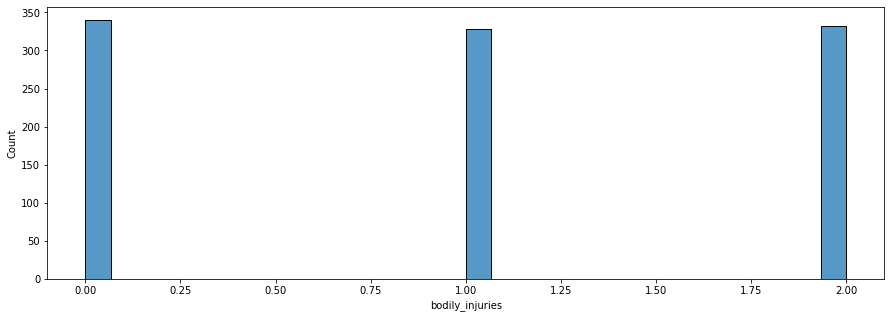

In [95]:
#HistPlot for "bodily_injuries" column
print(fraud["bodily_injuries"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="bodily_injuries",data=fraud,bins=30)

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


<AxesSubplot:xlabel='witnesses', ylabel='Count'>

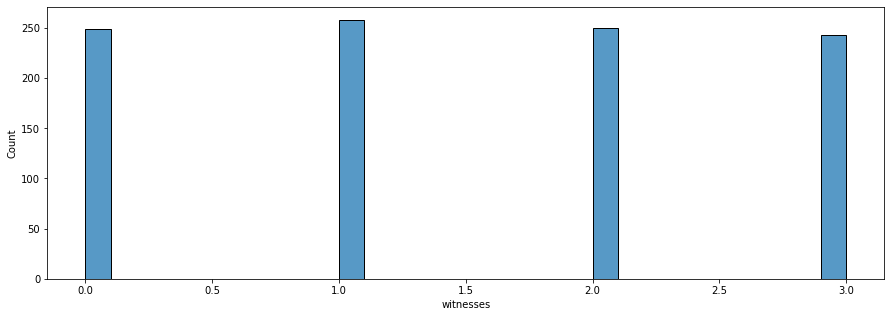

In [96]:
#HistPlot for "witnesses" column
print(fraud["witnesses"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="witnesses",data=fraud,bins=30)

59400    5
2640     4
70400    4
4320     4
44200    4
        ..
65250    1
87100    1
6240     1
66600    1
67500    1
Name: total_claim_amount, Length: 763, dtype: int64


<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

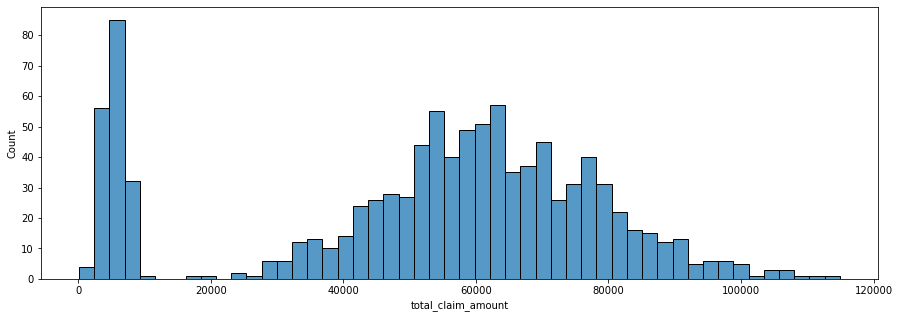

In [97]:
#HistPlot for "total_claim_amount" column
print(fraud["total_claim_amount"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="total_claim_amount",data=fraud,bins=50)     

7433.42     25
640.00       7
480.00       7
660.00       5
580.00       5
            ..
14840.00     1
6580.00      1
11820.00     1
16650.00     1
7500.00      1
Name: injury_claim, Length: 638, dtype: int64


<AxesSubplot:xlabel='injury_claim', ylabel='Count'>

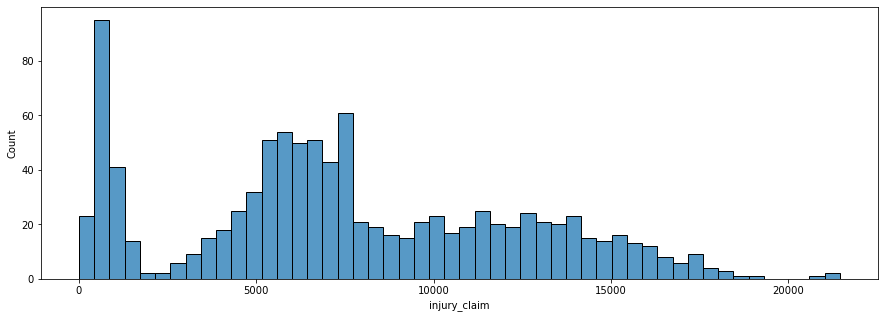

In [98]:
#HistPlot for "injury_claim" column
print(fraud["injury_claim"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="injury_claim",data=fraud,bins=50) 

7399.57     19
860.00       6
480.00       5
660.00       5
10000.00     5
            ..
3590.00      1
6480.00      1
4580.00      1
4920.00      1
7500.00      1
Name: property_claim, Length: 626, dtype: int64


<AxesSubplot:xlabel='property_claim', ylabel='Count'>

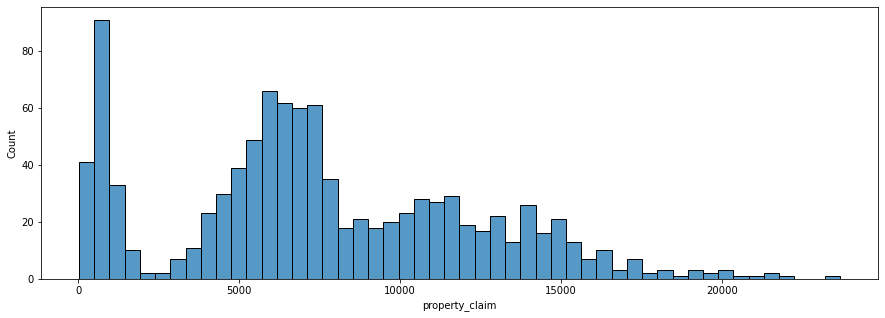

In [99]:
#HistPlot for "property_claim" column
print(fraud["property_claim"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="property_claim",data=fraud,bins=50) 

5040     7
3360     6
52080    5
4720     5
3600     5
        ..
43360    1
25130    1
38940    1
47430    1
52500    1
Name: vehicle_claim, Length: 726, dtype: int64


<AxesSubplot:xlabel='vehicle_claim', ylabel='Count'>

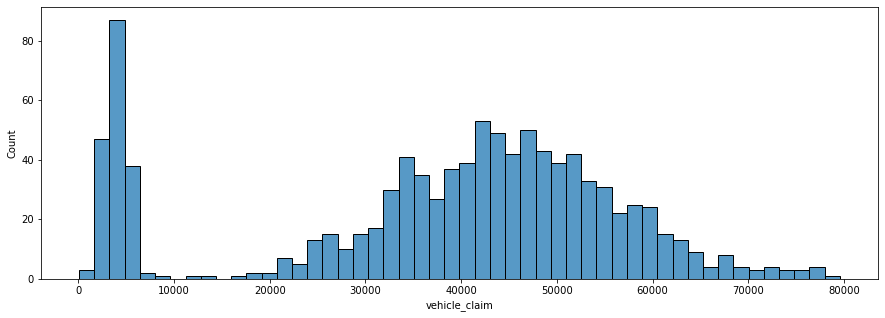

In [100]:
#Histplot for "vehicle_claim" column
print(fraud["vehicle_claim"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="vehicle_claim",data=fraud,bins=50) 

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64


<AxesSubplot:xlabel='auto_year', ylabel='Count'>

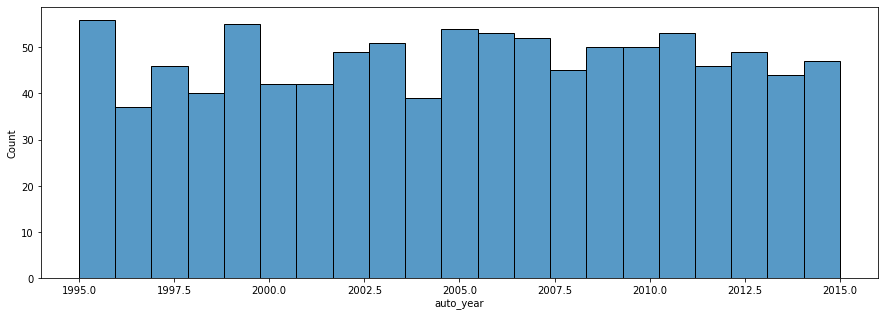

In [101]:
#Histplot for "auto_year" column
print(fraud["auto_year"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="auto_year",data=fraud,bins=21) 

25    55
14    50
24    48
26    48
19    44
2     43
7     43
20    43
15    41
10    41
22    41
11    40
17    40
9     40
21    39
6     38
13    37
12    36
4     36
3     35
8     33
23    33
5     32
16    31
18    30
1      3
Name: Policy_Bind_Age, dtype: int64


<AxesSubplot:xlabel='Policy_Bind_Age', ylabel='Count'>

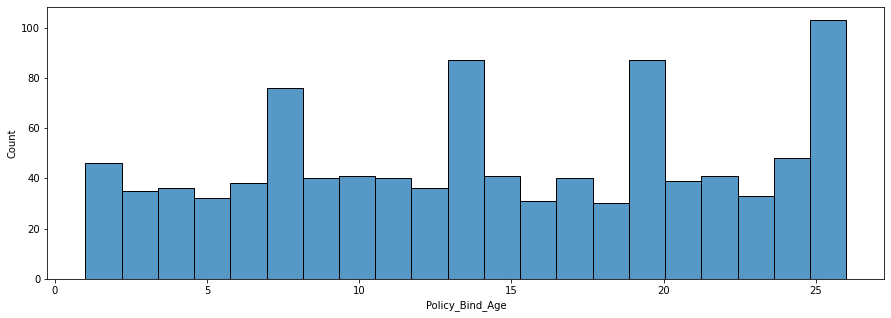

In [102]:
#Histplot for "Policy_Bind_Age" column
print(fraud["Policy_Bind_Age"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Policy_Bind_Age",data=fraud,bins=21) 

1     365
2     312
8      39
12     39
6      37
4      36
7      35
10     34
3      31
9      30
5      23
11     19
Name: Incident_Month, dtype: int64


<AxesSubplot:xlabel='Incident_Month', ylabel='Count'>

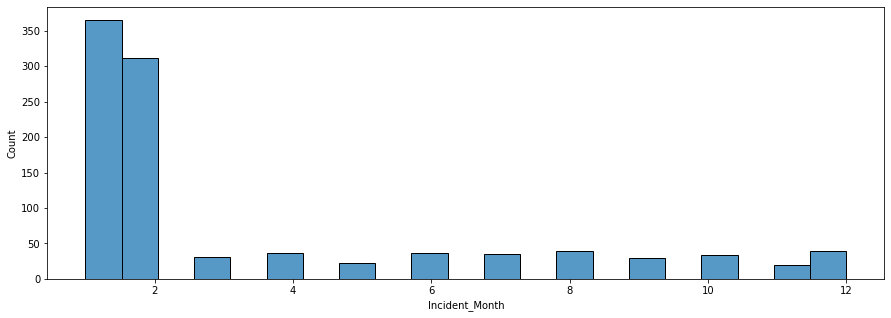

In [103]:
#Histplot for "Incident_Month" column
print(fraud["Incident_Month"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Incident_Month",data=fraud,bins=21) 

**Bivariate Analysis:**

<AxesSubplot:xlabel='policy_state', ylabel='count'>

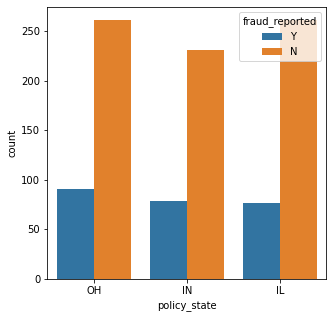

In [104]:
#Count Plot for comparision between "policy_state" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.countplot("policy_state",data=fraud, hue='fraud_reported')

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

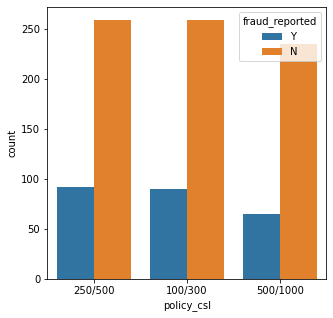

In [105]:
#Count Plot for comparision between "policy_csl" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.countplot("policy_csl",data=fraud, hue='fraud_reported')

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

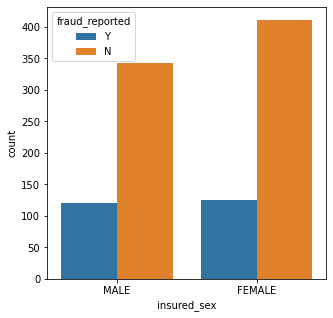

In [106]:
#Count Plot for comparision between "insured_sex" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.countplot("insured_sex",data=fraud, hue='fraud_reported')

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

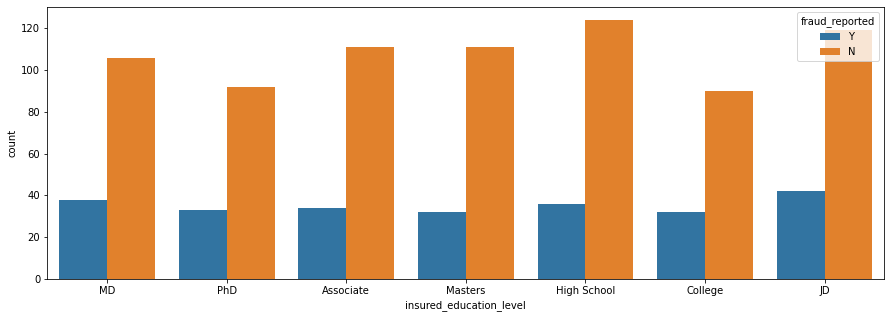

In [107]:
#Count Plot for comparision between "insured_education_level" column and "fraud_reported" column
plt.figure(figsize=(15,5))
sns.countplot("insured_education_level",data=fraud, hue='fraud_reported')

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

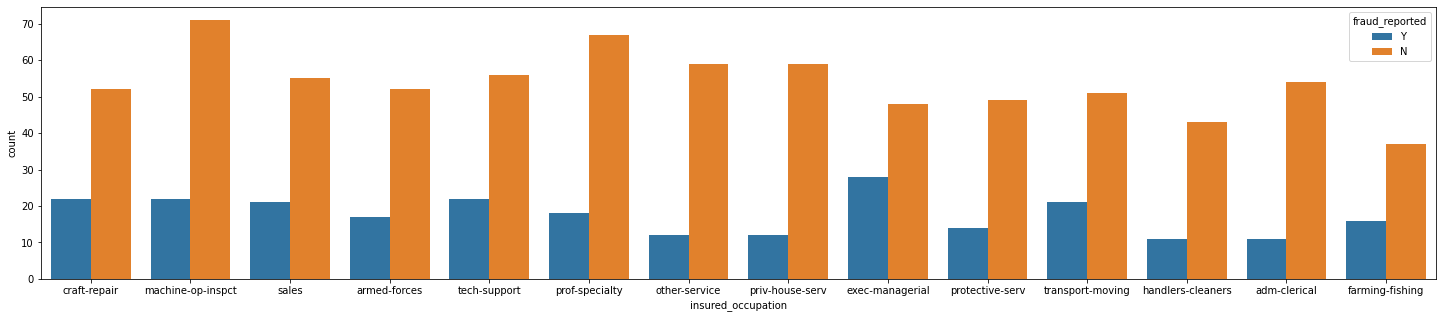

In [108]:
#Count Plot for comparision between "insured_occupation" column and "fraud_reported" column
plt.figure(figsize=(25,5))
sns.countplot("insured_occupation",data=fraud, hue='fraud_reported')

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

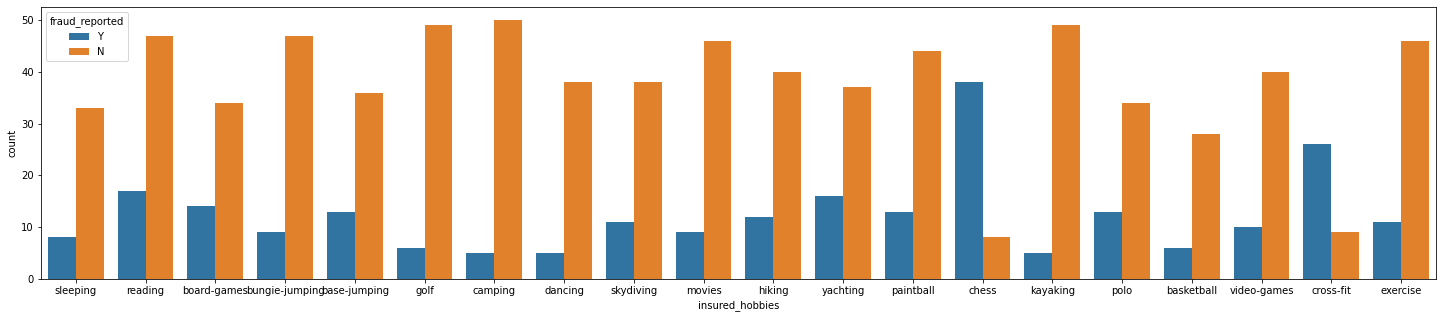

In [109]:
#Count Plot for comparision between "insured_hobbies" column and "fraud_reported" column
plt.figure(figsize=(25,5))
sns.countplot("insured_hobbies",data=fraud, hue='fraud_reported')

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

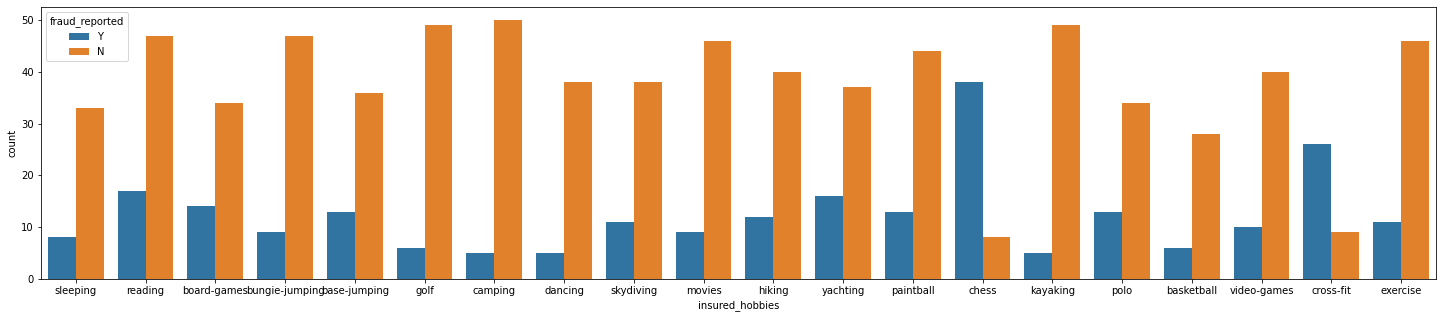

In [110]:
#Count Plot for comparision between "insured_hobbies" column and "fraud_reported" column
plt.figure(figsize=(25,5))
sns.countplot("insured_hobbies",data=fraud, hue='fraud_reported')

<AxesSubplot:xlabel='incident_type', ylabel='count'>

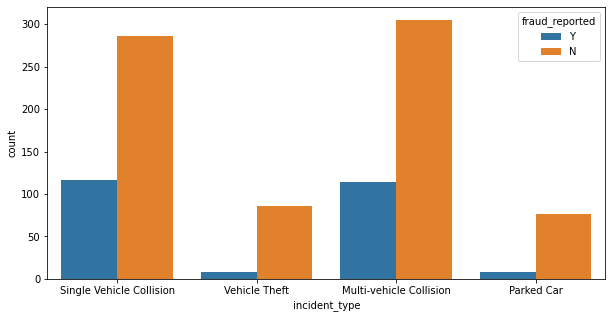

In [111]:
#Count Plot for comparision between "incident_type" column and "fraud_reported" column
plt.figure(figsize=(10,5))
sns.countplot("incident_type",data=fraud, hue='fraud_reported')

<AxesSubplot:xlabel='collision_type', ylabel='count'>

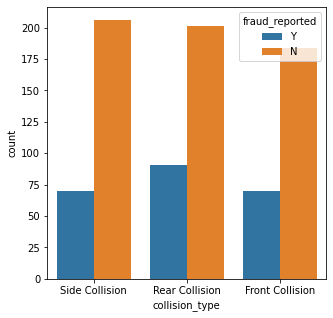

In [112]:
#Count Plot for comparision between "collision_type" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.countplot("collision_type",data=fraud, hue='fraud_reported')

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

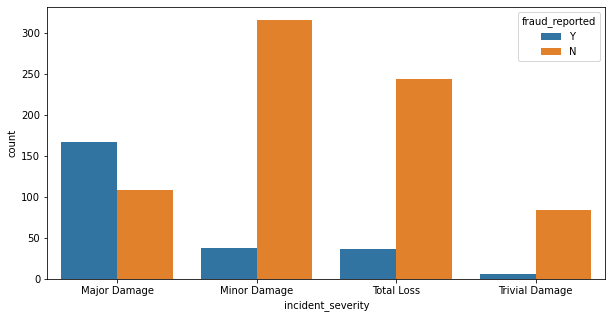

In [113]:
#Count Plot for comparision between "incident_severity" column and "fraud_reported" column
plt.figure(figsize=(10,5))
sns.countplot("incident_severity",data=fraud, hue='fraud_reported')    

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

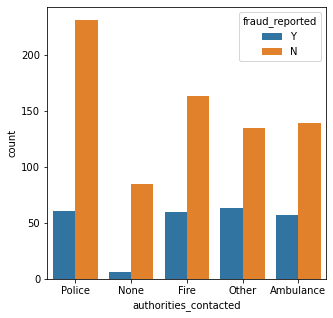

In [114]:
#Count Plot for comparision between "authorities_contacted" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.countplot("authorities_contacted",data=fraud, hue='fraud_reported')

<AxesSubplot:xlabel='incident_state', ylabel='count'>

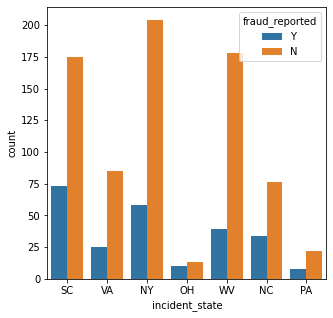

In [115]:
#Count Plot for comparision between "incident_state" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.countplot("incident_state",data=fraud, hue='fraud_reported')

<AxesSubplot:xlabel='incident_city', ylabel='count'>

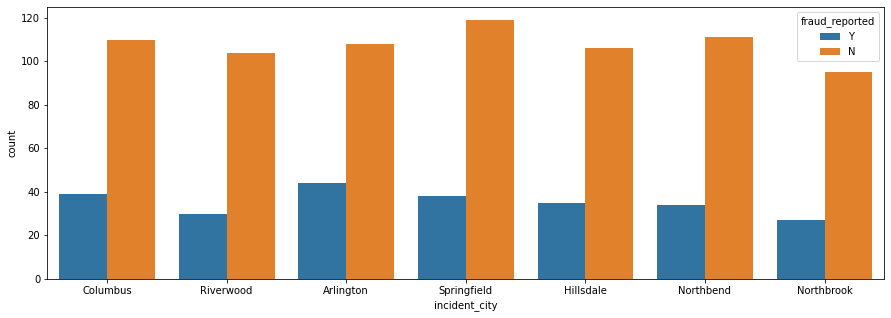

In [116]:
#Count Plot for comparision between "incident_city" column and "fraud_reported" column
plt.figure(figsize=(15,5))
sns.countplot("incident_city",data=fraud, hue='fraud_reported')

<AxesSubplot:xlabel='property_damage', ylabel='count'>

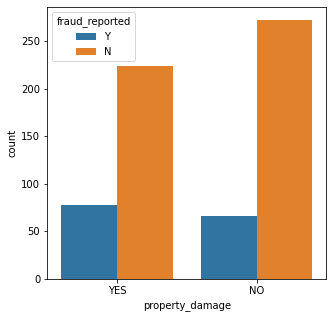

In [117]:
#Count Plot for comparision between "property_damage" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.countplot("property_damage",data=fraud, hue='fraud_reported')

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

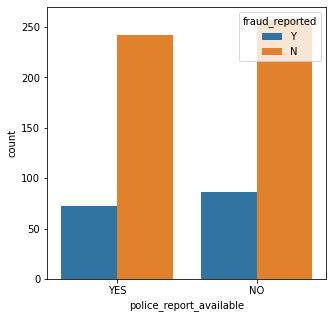

In [118]:
#Count Plot for comparision between "police_report_available" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.countplot("police_report_available",data=fraud, hue='fraud_reported')

<AxesSubplot:xlabel='auto_make', ylabel='count'>

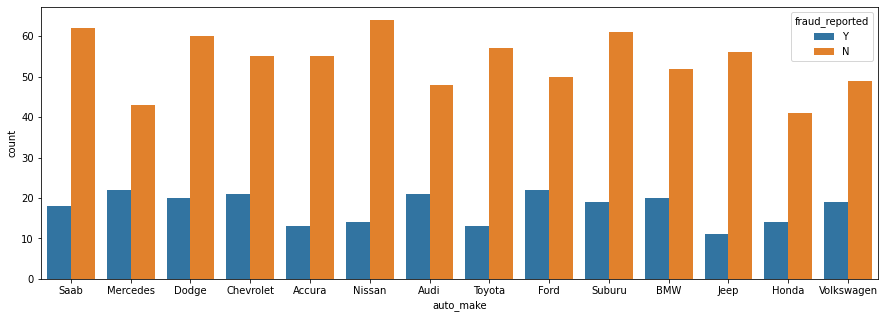

In [119]:
#Count Plot for comparision between "auto_make" column and "fraud_reported" column
plt.figure(figsize=(15,5))
sns.countplot("auto_make",data=fraud, hue='fraud_reported')

<AxesSubplot:xlabel='auto_model', ylabel='count'>

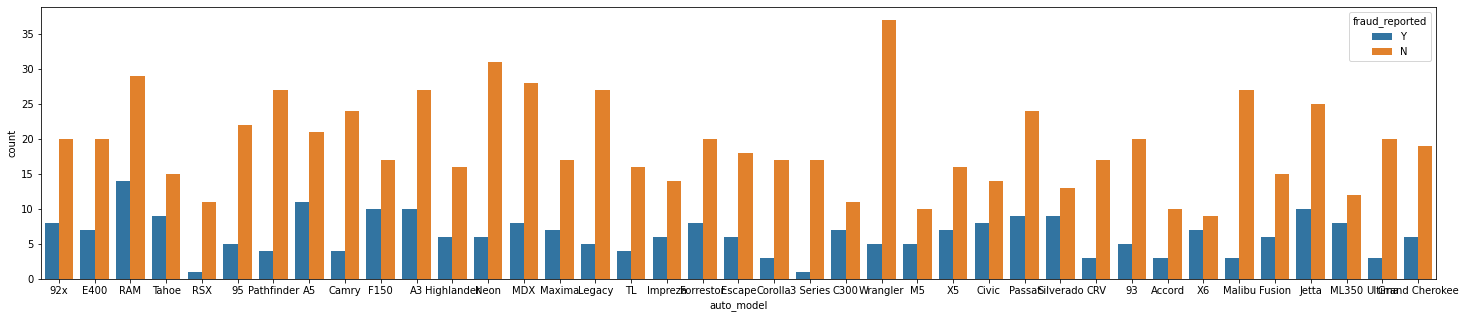

In [120]:
#Count Plot for comparision between "auto_model" column and "fraud_reported" column
plt.figure(figsize=(25,5))
sns.countplot("auto_model",data=fraud, hue='fraud_reported')

<AxesSubplot:xlabel='fraud_reported', ylabel='months_as_customer'>

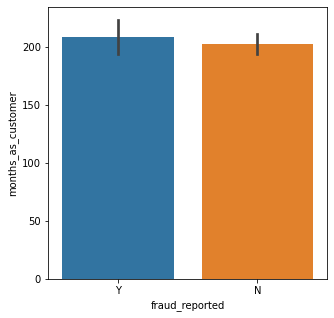

In [121]:
#Bar Plot for comparision between "months_as_customer" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.barplot(y="months_as_customer",data=fraud, x='fraud_reported')

<AxesSubplot:xlabel='fraud_reported', ylabel='age'>

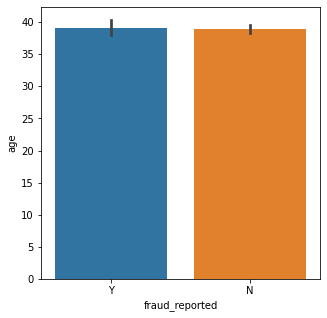

In [122]:
#Bar Plot for comparision between "age" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.barplot(y="age",data=fraud, x='fraud_reported')

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_number'>

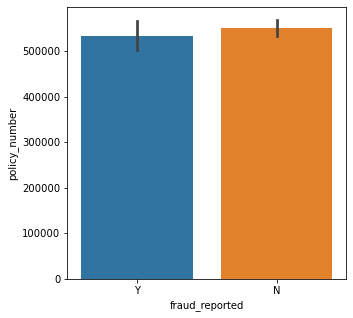

In [123]:
#Bar Plot for comparision between "policy_number" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.barplot(y="policy_number",data=fraud, x='fraud_reported')

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_deductable'>

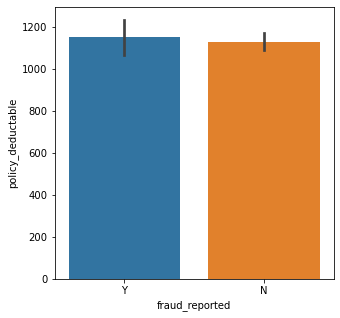

In [124]:
#Bar Plot for comparision between "policy_deductable" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.barplot(y="policy_deductable",data=fraud, x='fraud_reported')

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_annual_premium'>

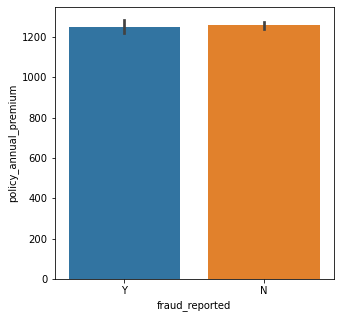

In [125]:
#Bar Plot for comparision between "policy_annual_premium" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.barplot(y="policy_annual_premium",data=fraud, x='fraud_reported')

<AxesSubplot:xlabel='fraud_reported', ylabel='umbrella_limit'>

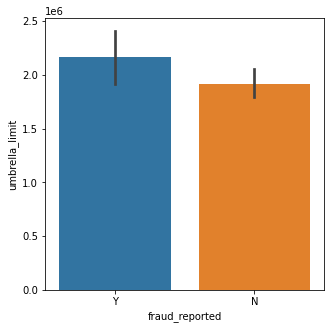

In [126]:
#Barplot for comparision between "umbrella_limit" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.barplot(y="umbrella_limit",data=fraud, x='fraud_reported')

<AxesSubplot:xlabel='fraud_reported', ylabel='insured_zip'>

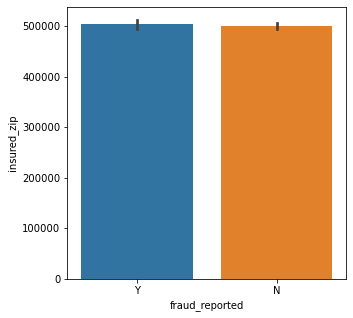

In [127]:
#Bar Plot for comparision between "insured_zip" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.barplot(y="insured_zip",data=fraud, x='fraud_reported')

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-gains'>

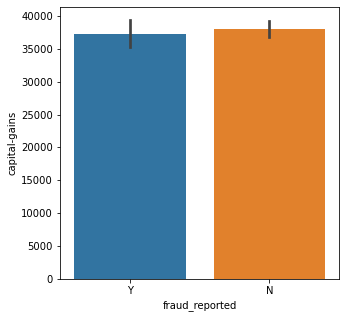

In [128]:
#Bar Plot for comparision between "capital-gains" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.barplot(y="capital-gains",data=fraud, x='fraud_reported')

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-loss'>

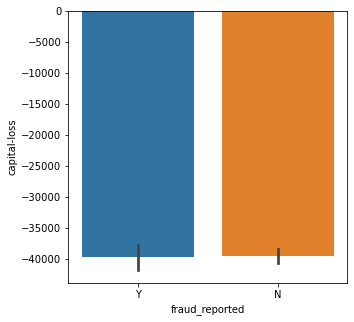

In [129]:
#Bar Plot for comparision between "capital-loss" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.barplot(y="capital-loss",data=fraud, x='fraud_reported')

<AxesSubplot:xlabel='fraud_reported', ylabel='incident_hour_of_the_day'>

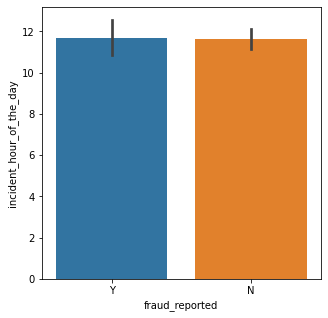

In [130]:
#Bar Plot for comparision between "incident_hour_of_the_day" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.barplot(y="incident_hour_of_the_day",data=fraud, x='fraud_reported')

<AxesSubplot:xlabel='fraud_reported', ylabel='number_of_vehicles_involved'>

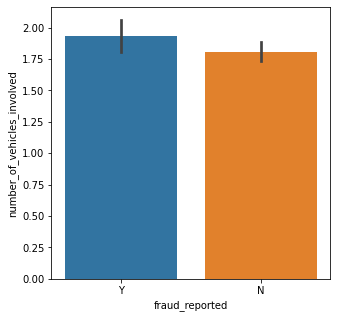

In [131]:
#Bar Plot for comparision between "number_of_vehicles_involved" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.barplot(y="number_of_vehicles_involved",data=fraud, x='fraud_reported')

<AxesSubplot:xlabel='fraud_reported', ylabel='bodily_injuries'>

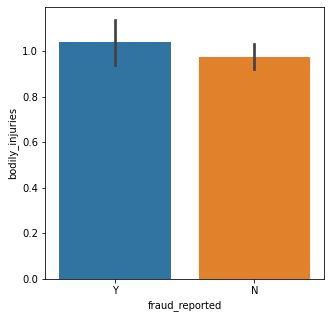

In [132]:
#Bar Plot for comparision between "bodily_injuries" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.barplot(y="bodily_injuries",data=fraud, x='fraud_reported')

<AxesSubplot:xlabel='fraud_reported', ylabel='witnesses'>

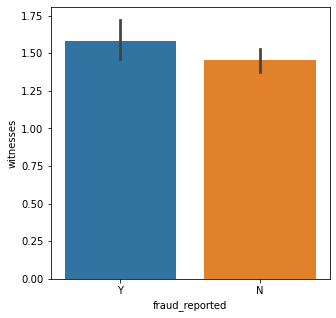

In [133]:
#Bar Plot for comparision between "witnesses" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.barplot(y="witnesses",data=fraud, x='fraud_reported')

<AxesSubplot:xlabel='fraud_reported', ylabel='total_claim_amount'>

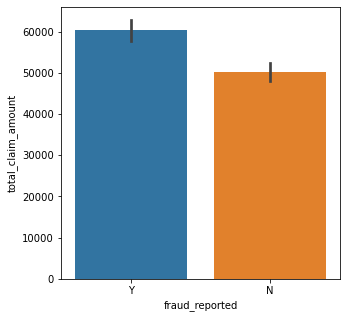

In [134]:
#Bar Plot for comparision between "total_claim_amount" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.barplot(y="total_claim_amount",data=fraud, x='fraud_reported')

<AxesSubplot:xlabel='fraud_reported', ylabel='injury_claim'>

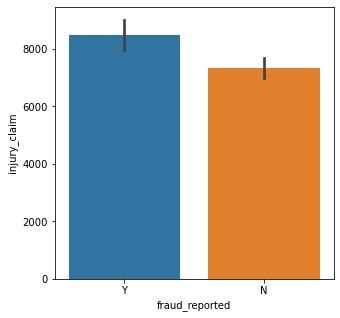

In [135]:
#Bar Plot for comparision between "injury_claim" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.barplot(y="injury_claim",data=fraud, x='fraud_reported')

<AxesSubplot:xlabel='fraud_reported', ylabel='property_claim'>

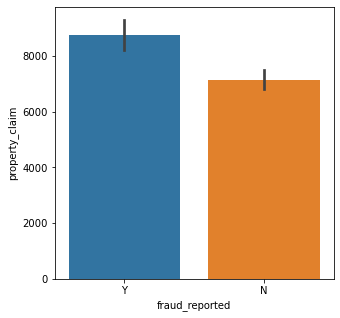

In [136]:
#Bar Plot for comparision between "property_claim" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.barplot(y="property_claim",data=fraud, x='fraud_reported')

<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

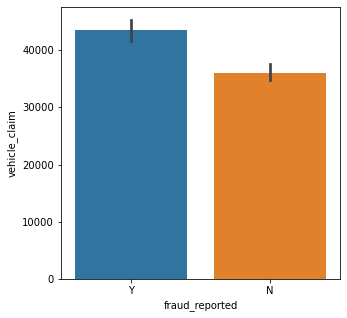

In [137]:
#Bar Plot for comparision between "vehicle_claim" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.barplot(y="vehicle_claim",data=fraud, x='fraud_reported')

<AxesSubplot:xlabel='fraud_reported', ylabel='auto_year'>

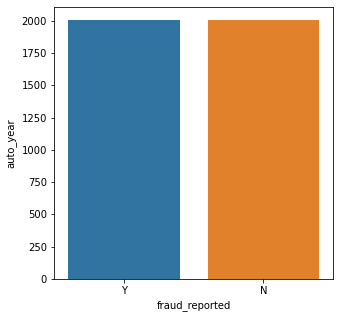

In [138]:
#Bar Plot for comparision between "auto_year" column and "fraud_reported" column
plt.figure(figsize=(5,5))
sns.barplot(y="auto_year",data=fraud, x='fraud_reported')

In [139]:
# Droping irrelevant column

In [140]:
fraud.drop(columns=['policy_number','insured_zip','incident_location'],inplace=True)

# Label Encoding

In [141]:
enc = LabelEncoder()
for i in fraud.columns:
    if fraud[i].dtypes=="object":
        fraud[i]=enc.fit_transform(fraud[i].values.reshape(-1,1))

In [142]:
# to verify
fraud.dtypes

months_as_customer               int64
age                              int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                  float64
capital-loss                   float64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                        int64
police_report_available  

# Correlation:

In [143]:
fraud.corr()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy_Bind_Age,Incident_Month
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.017658,0.060925,-0.000833,0.009814,...,0.062108,0.070206,0.038711,0.061013,0.047655,0.004202,-0.000292,0.020544,0.048276,0.024659
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.022174,0.073337,0.000969,0.017220,...,0.069863,0.078958,0.062505,0.062588,0.030410,0.017343,0.001354,0.012143,0.037444,0.023404
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.032730,-0.020481,-0.034327,-0.031215,...,-0.006002,-0.035151,0.006210,0.001425,0.017124,-0.025253,0.002114,0.029432,0.007276,0.023643
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.023590,-0.010757,0.009153,0.015788,...,-0.055758,-0.098418,-0.039441,-0.046791,-0.004701,0.047885,-0.033082,-0.037190,0.016466,-0.011794
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.014209,-0.009733,0.015217,-0.046733,...,0.022839,0.017460,0.060968,0.005269,-0.035379,-0.003268,0.026105,0.014817,0.049598,-0.006418
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.007658,0.038853,-0.019715,0.035922,...,0.009094,-0.028274,-0.019886,0.020246,0.000045,-0.031849,-0.049226,-0.014480,-0.001249,0.021559
umbrella_limit,0.017658,0.022174,-0.032730,0.023590,0.014209,-0.007658,1.000000,0.008975,-0.018795,0.024223,...,-0.041842,-0.056582,-0.020354,-0.039964,-0.006983,0.042347,0.011482,0.057885,-0.045270,0.042185
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,0.008975,1.000000,0.009002,-0.006160,...,-0.023727,-0.007161,-0.020879,-0.029609,0.026457,-0.018421,-0.028247,0.030873,0.032891,0.024227
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,-0.018795,0.009002,1.000000,-0.020298,...,0.074226,0.070595,0.062471,0.068348,0.055202,0.049445,0.043509,0.008808,-0.018952,0.075083
insured_occupation,0.009814,0.017220,-0.031215,0.015788,-0.046733,0.035922,0.024223,-0.006160,-0.020298,1.000000,...,0.003692,0.021887,0.011909,-0.000829,0.042621,0.020584,-0.006676,0.001564,0.027085,0.019403


In [144]:
fraud.corr()["fraud_reported"].sort_values()

incident_severity             -0.405988
collision_type                -0.135725
incident_state                -0.051407
incident_type                 -0.050376
insured_hobbies               -0.046838
authorities_contacted         -0.045802
incident_city                 -0.040403
policy_csl                    -0.037190
auto_make                     -0.027519
capital-gains                 -0.019227
policy_annual_premium         -0.014480
capital-loss                  -0.005125
Policy_Bind_Age                0.000059
auto_model                     0.000720
insured_occupation             0.001564
incident_hour_of_the_day       0.004316
auto_year                      0.007928
police_report_available        0.008399
insured_education_level        0.008808
age                            0.012143
Incident_Month                 0.014495
policy_deductable              0.014817
months_as_customer             0.020544
insured_relationship           0.021043
policy_state                   0.029432


<AxesSubplot:>

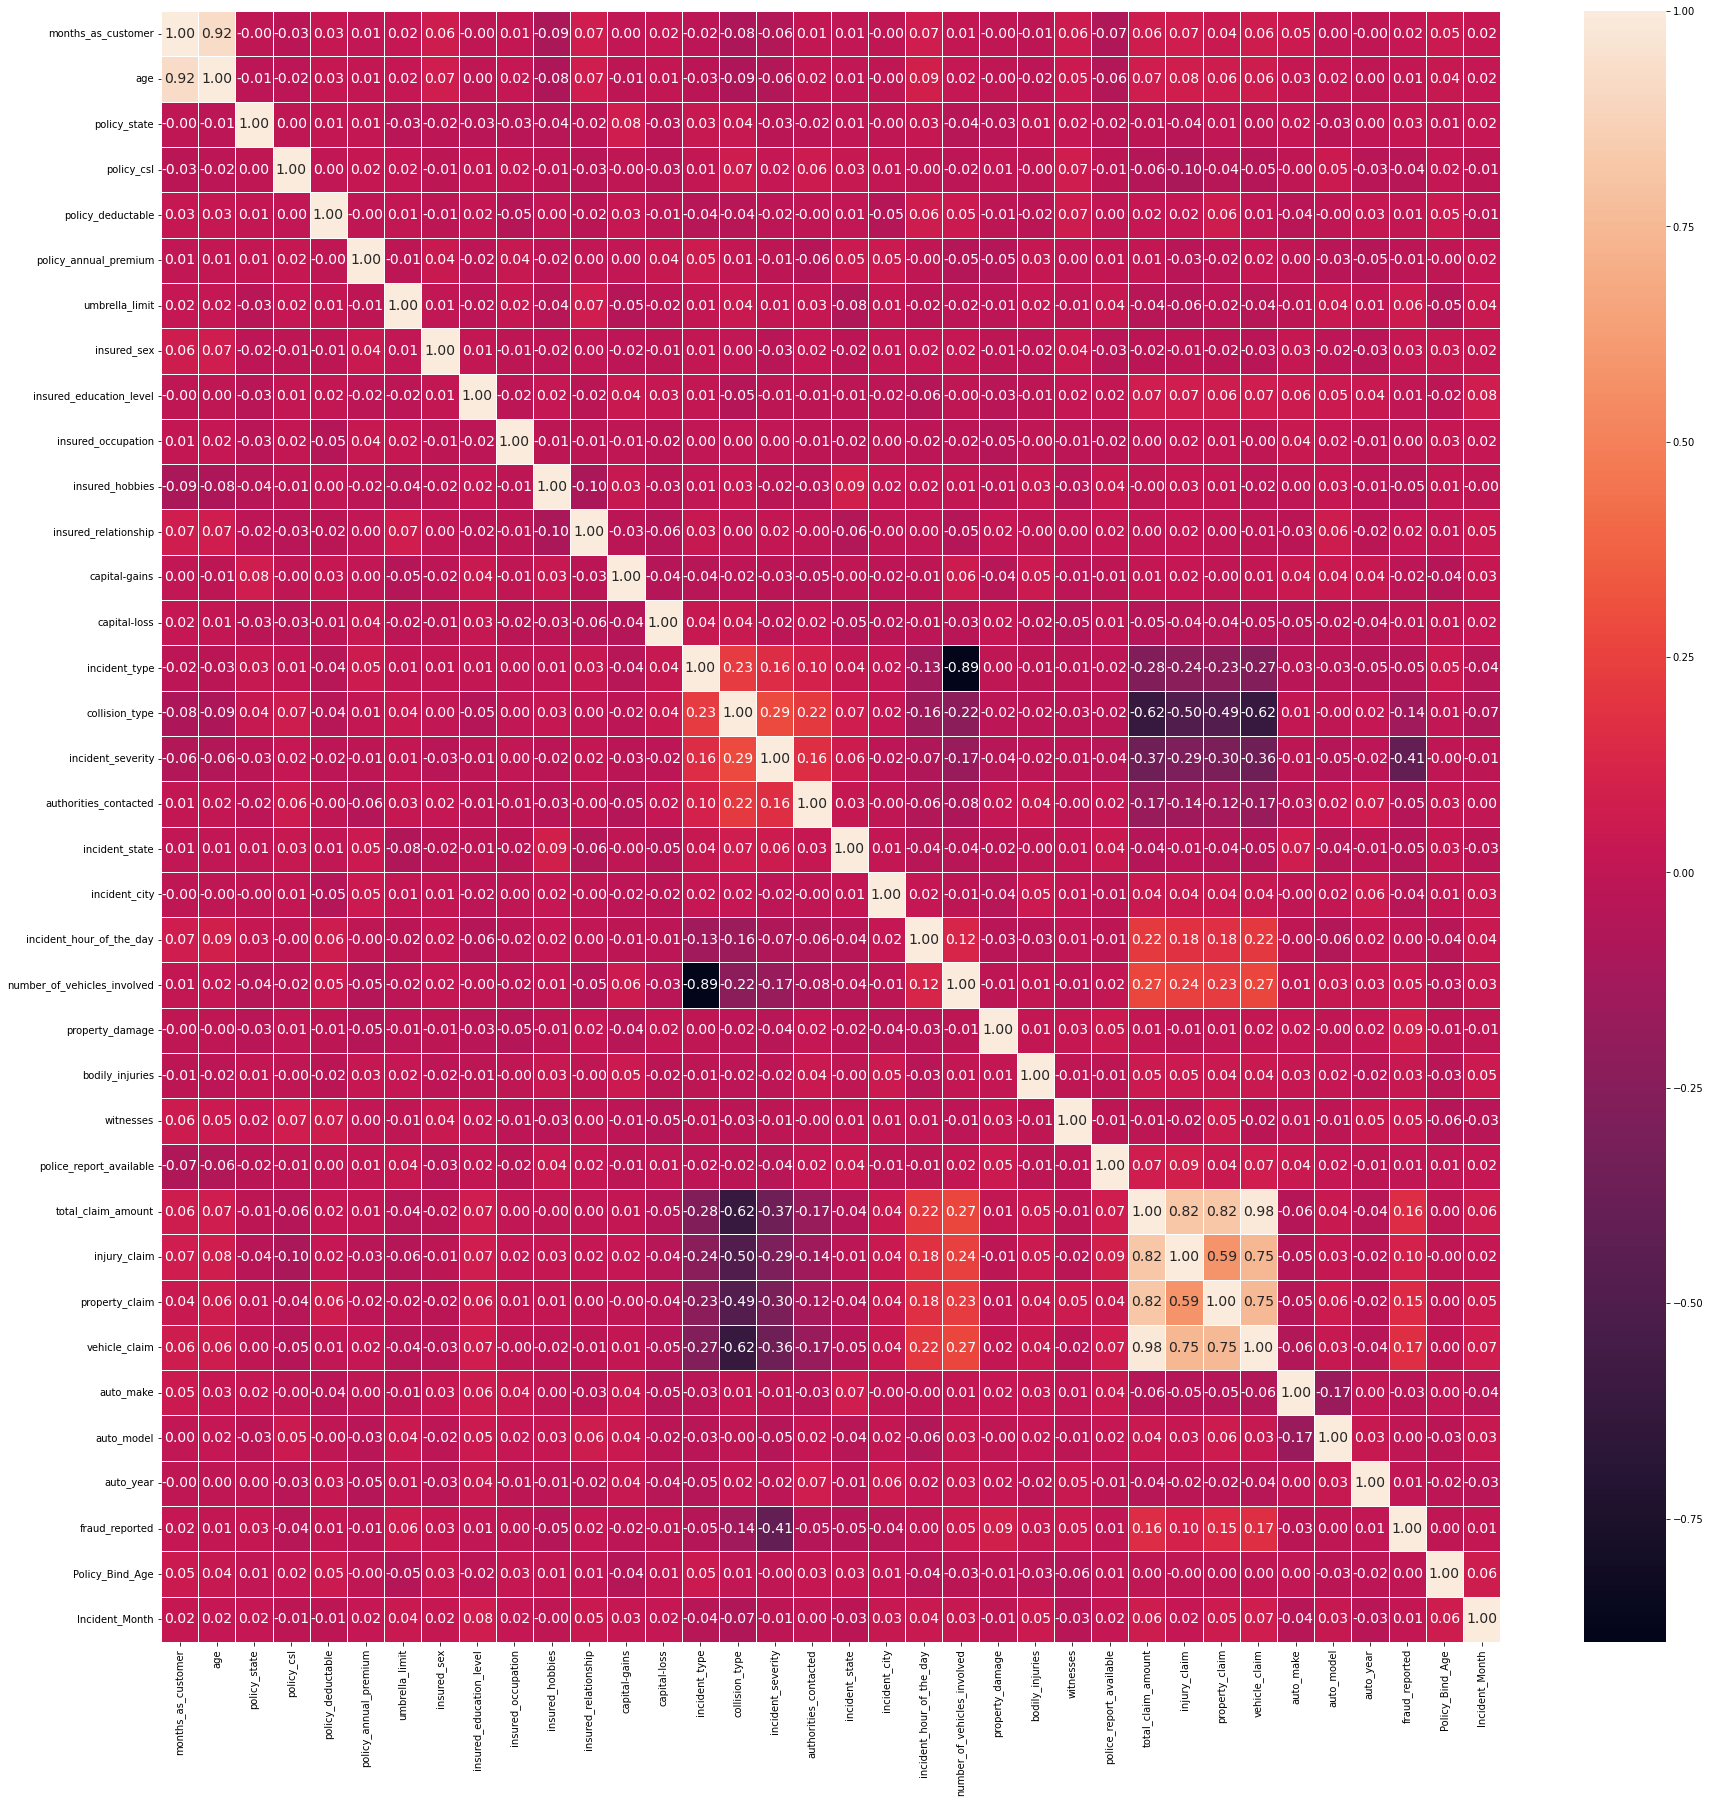

In [145]:
plt.figure(figsize=(30,30))
sns.heatmap(fraud.corr(),annot=True,annot_kws= {"size": 14}, linewidth=0.5, linecolor='white', fmt='.2f')

**Maximum correlation is with vehicle_claim**

**Minimum correlation is with incident_severity**

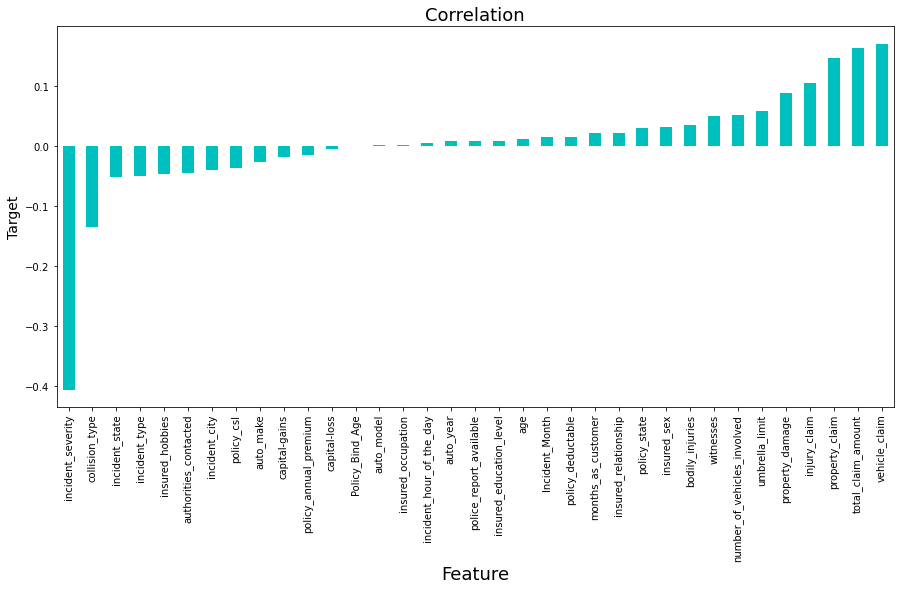

In [146]:
# Checking Correlation using BarPlot:

plt.figure(figsize=(15,7))
fraud.corr()['fraud_reported'].sort_values(ascending=True).drop(['fraud_reported']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()


In [147]:
#Droping "Policy_Bind_Age" column from dataset because this column have no relation with our Target Column. 
fraud=fraud.drop(columns="Policy_Bind_Age", axis=1)

# Outliers Detection

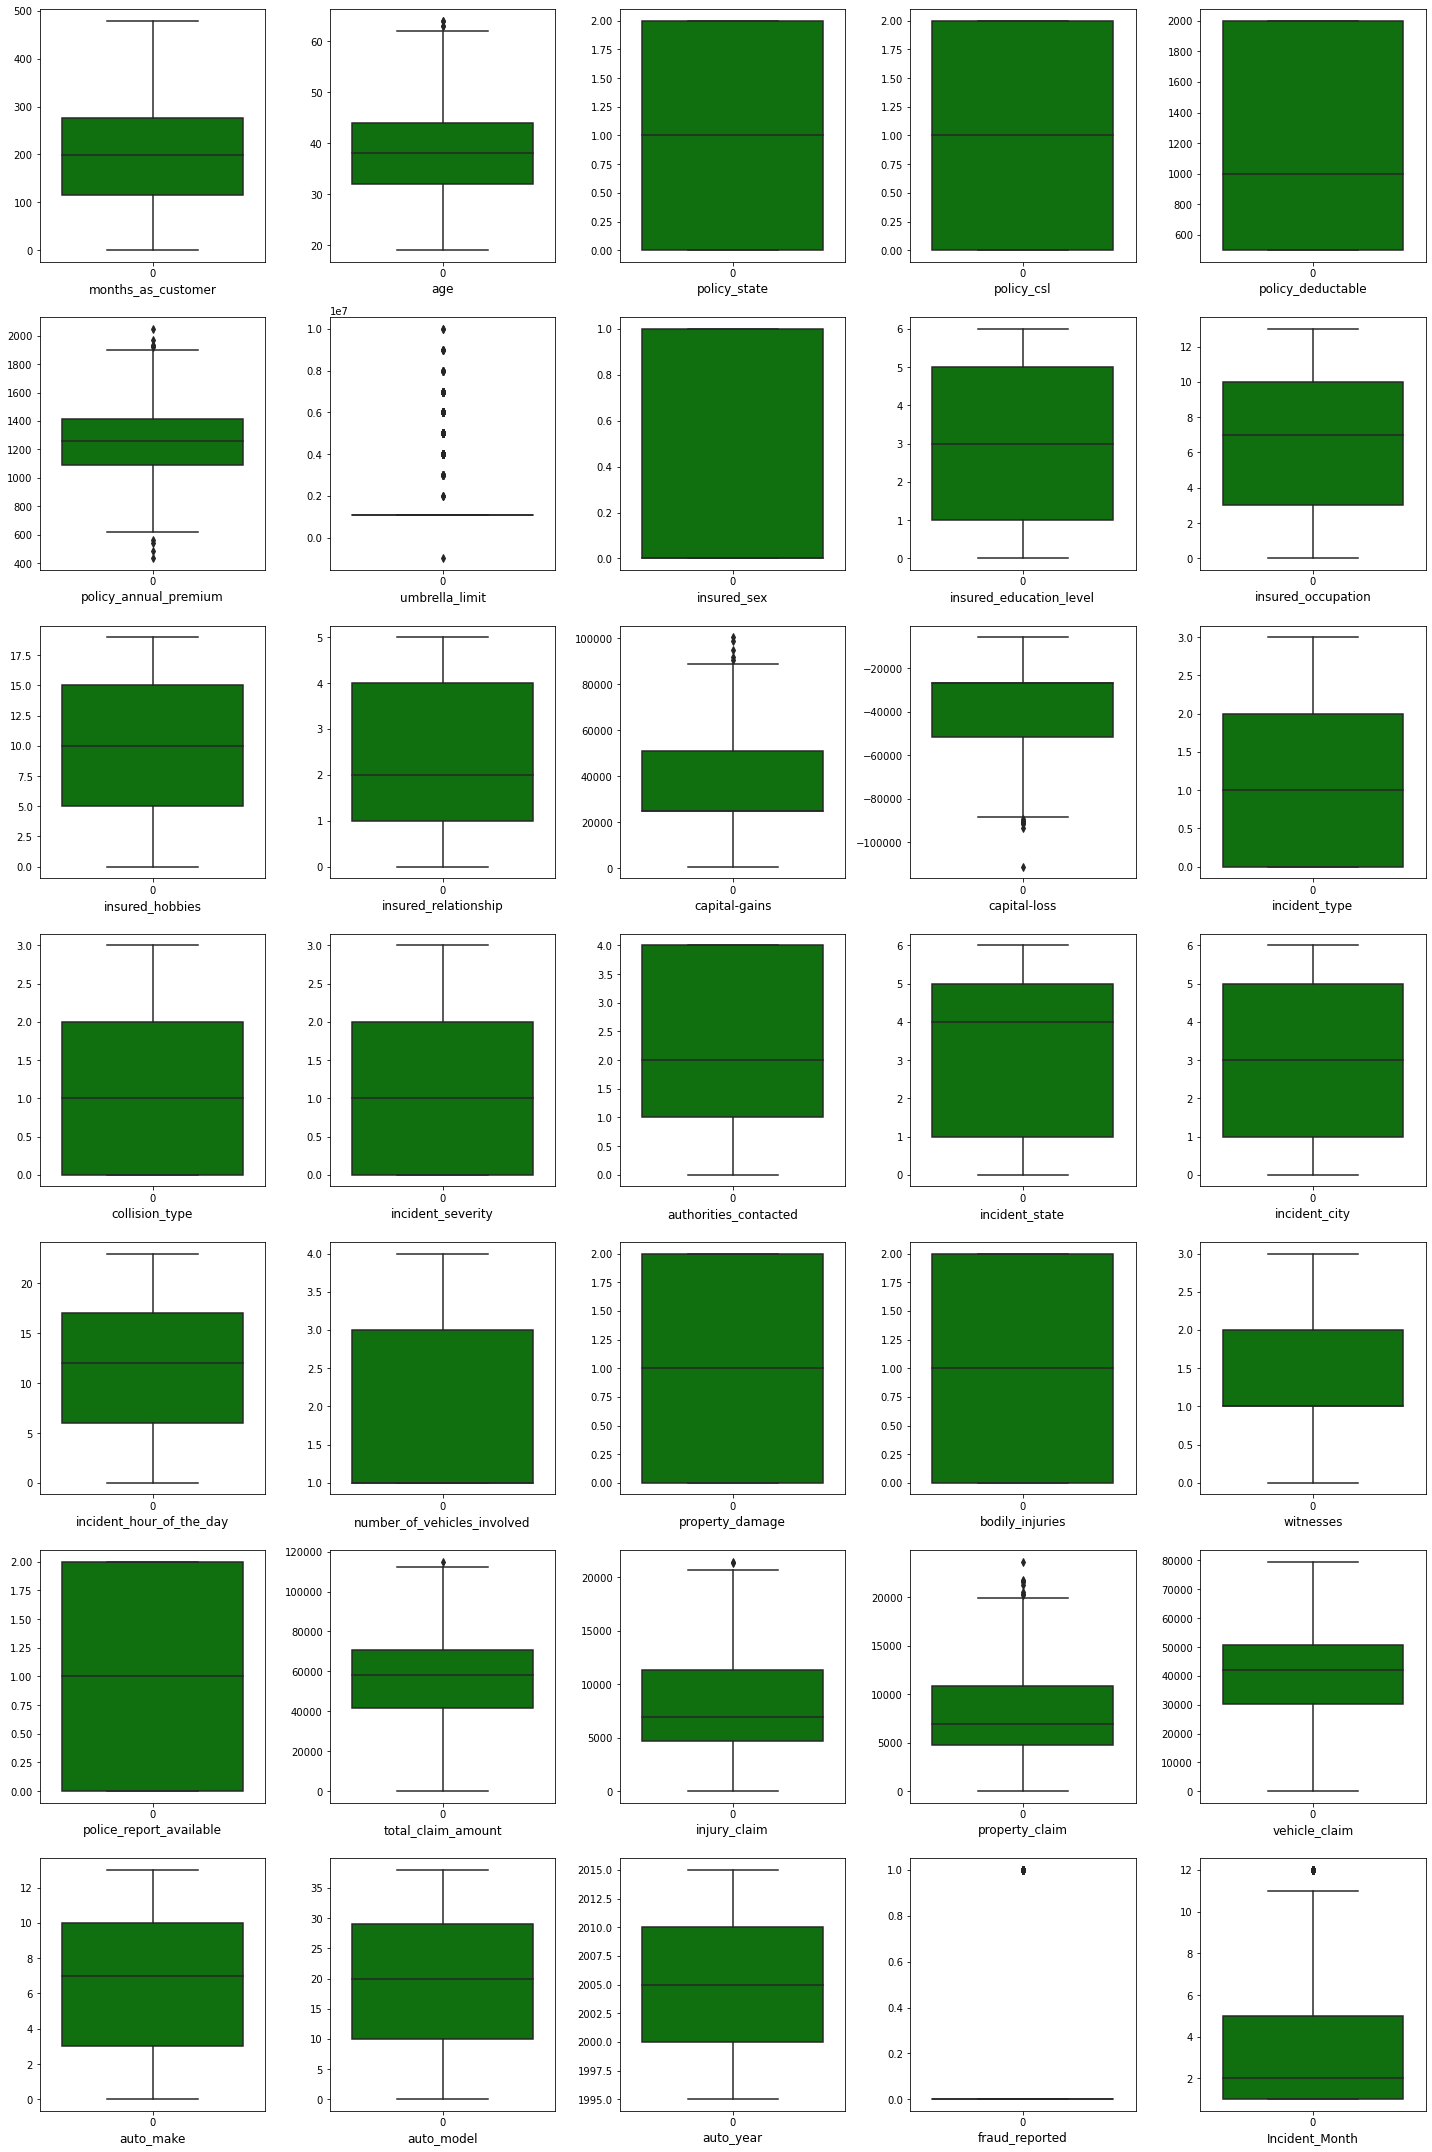

In [148]:
columns=fraud.columns.values
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in fraud:
    if plotnumber<=35:
        ax = plt.subplot(7,5,plotnumber)
        sns.boxplot(data=fraud[column],color='green',orient='v')
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [149]:
# Removing Outliers using Zscore method using Scipy

In [150]:
variables = fraud[['age', 'policy_annual_premium', 'umbrella_limit','capital-gains','capital-loss','total_claim_amount', 'injury_claim', 'property_claim','Incident_Month']]
z=np.abs(zscore(variables))

# Creating new dataframe
fraud_detection = fraud[(z<3).all(axis=1)]
fraud_detection.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Incident_Month
0,328,48,2,1,1000,1406.91,1101000,1,4,2,...,1,71610,6510.0,13020.0,52080,10,1,2004,1,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,2,5070,780.0,780.0,3510,8,12,2007,1,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,...,0,34650,7700.0,3850.0,23100,4,30,2007,0,2
3,256,41,0,1,2000,1415.74,6000000,0,6,1,...,0,63400,6340.0,6340.0,50720,3,34,2014,1,10
4,228,44,0,2,1000,1583.91,6000000,1,0,11,...,0,6500,1300.0,650.0,4550,0,31,2009,0,2


In [151]:
z.head()

,age,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,total_claim_amount,injury_claim,property_claim,Incident_Month
0,0.990836,0.616705,0.467397,0.901099,0.752472,0.714257,0.234457,1.163172,0.735040
1,0.334073,0.242521,1.606795,0.746385,0.752472,1.807312,1.445575,1.434938,0.735040
2,1.088913,0.642233,1.606795,0.163156,0.752472,0.686362,0.017067,0.783288,0.429664
3,0.224613,0.652886,2.138776,0.643807,1.352715,0.403135,0.270389,0.254751,2.013343
4,0.552994,1.341980,2.138776,1.643739,0.383082,1.753121,1.335665,1.462533,0.429664


In [152]:
fraud_detection.shape

(970, 35)

In [153]:
# To find total number of dropped rows:
fraud.shape[0]-fraud_detection.shape[0]

30

In [154]:
# To calculate data loss:
loss_percent=(1000-970)/1000*100
print(loss_percent,"%")

3.0 %


In [155]:
#Checking Skewness
fraud_detection.skew()

months_as_customer             0.362223
age                            0.477395
policy_state                  -0.044333
policy_csl                     0.097346
policy_deductable              0.479058
policy_annual_premium          0.044323
umbrella_limit                 1.890782
insured_sex                    0.136610
insured_education_level        0.011899
insured_occupation            -0.063436
insured_hobbies               -0.063716
insured_relationship           0.069920
capital-gains                  0.943831
capital-loss                  -0.932941
incident_type                  0.085481
collision_type                 0.129939
incident_severity              0.271101
authorities_contacted         -0.116543
incident_state                -0.141274
incident_city                  0.039395
incident_hour_of_the_day      -0.043900
number_of_vehicles_involved    0.513830
property_damage               -0.046410
bodily_injuries                0.001897
witnesses                      0.023900


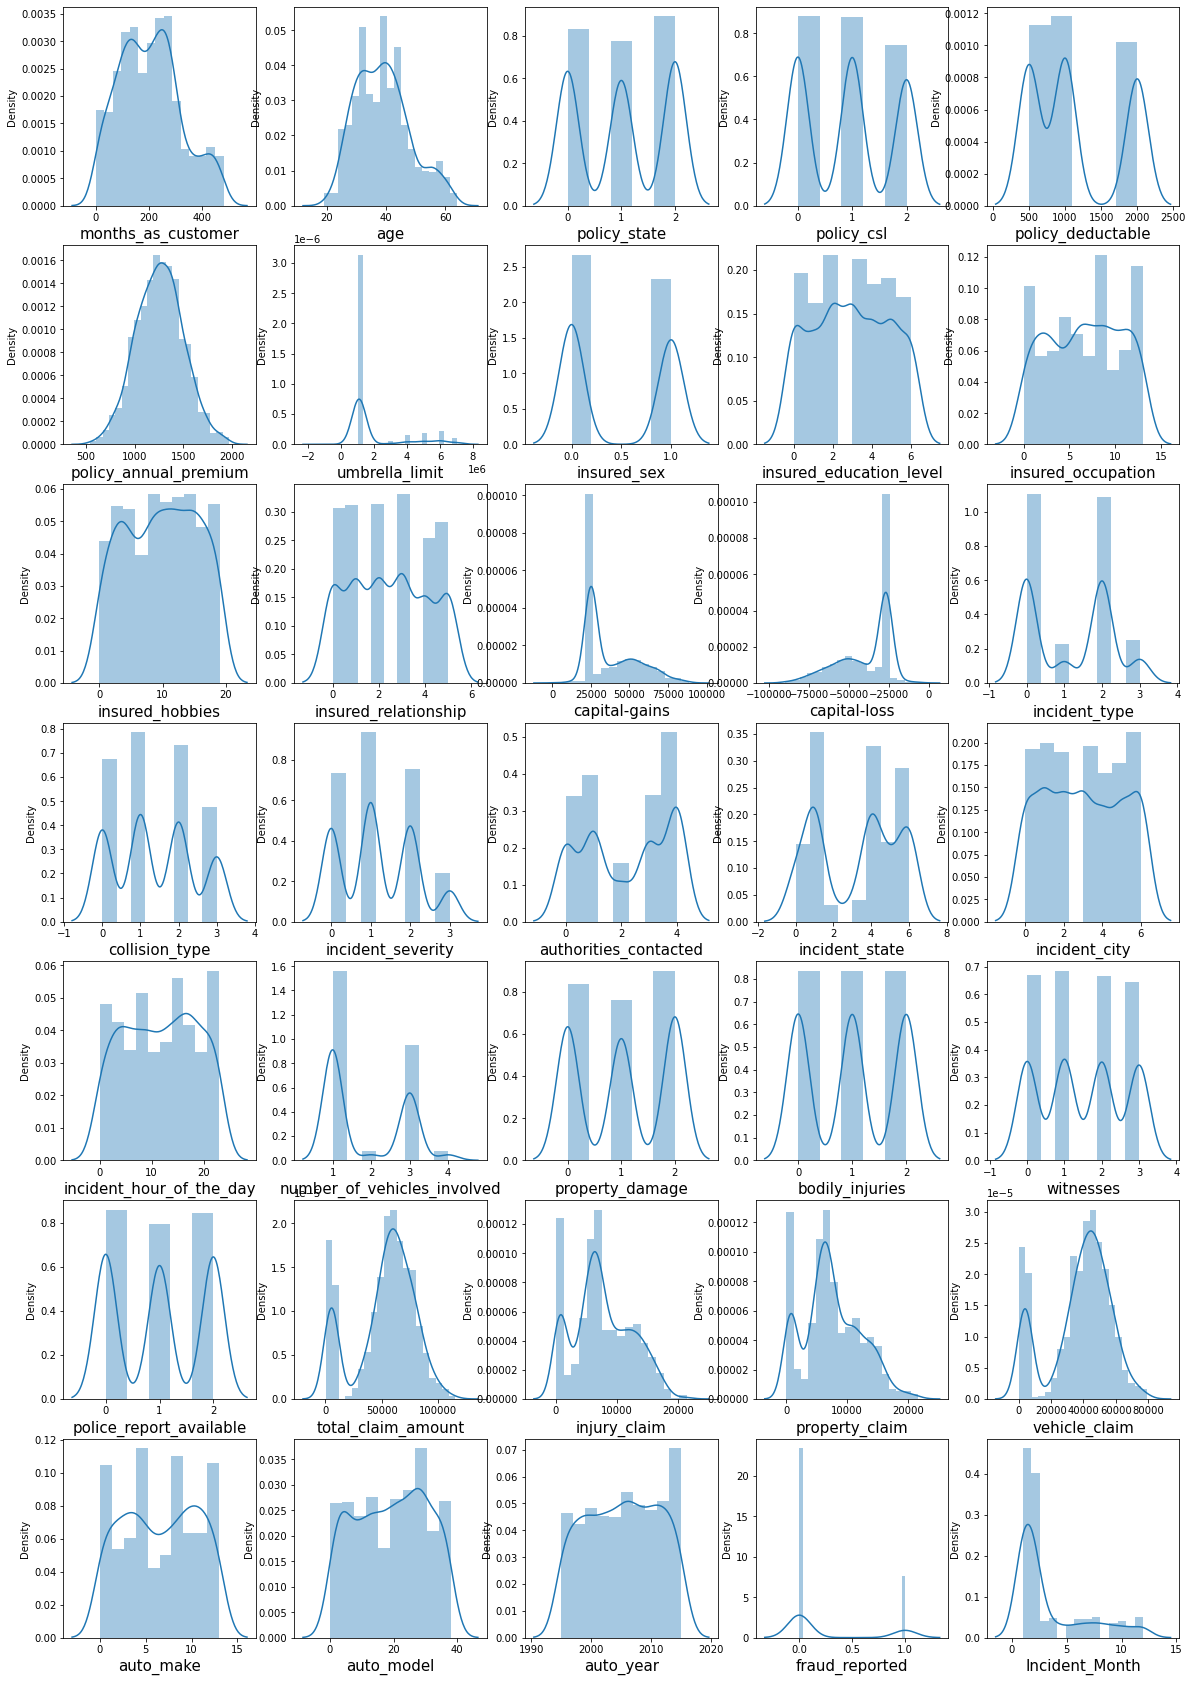

In [156]:
#Checking skweness through Data Visualization also
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in fraud_detection:
    if plotnumber<=35:
        ax = plt.subplot(7,5,plotnumber)
        sns.distplot(fraud_detection[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

**We observed that the skewness is present in almost all the columns.**

In [157]:
#Removing skewness using yeo-johnson method

columns=['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 'number_of_vehicles_involved', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',  'Incident_Month']
fraud_detection[columns]=power_transform(fraud_detection[columns],method='yeo-johnson')
fraud_detection[columns]

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,total_claim_amount,injury_claim,property_claim,vehicle_claim,Incident_Month
0,1.041996,1.000805,0.063749,-0.449266,1.032816,0.752287,-0.836244,0.722144,-0.092989,1.120326,0.759575,-1.103235
1,0.298095,0.426980,1.273647,1.818253,-0.754778,0.752287,-0.836244,-1.775394,-1.641224,-1.649355,-1.784536,-1.103235
2,-0.515153,-1.133360,1.273647,1.818253,0.028319,0.752287,1.201438,-0.711033,0.145358,-0.679337,-0.814721,-0.019972
3,0.516118,0.324046,1.273647,2.371309,0.823241,-1.353674,-0.836244,0.397987,-0.128244,-0.107227,0.683595,1.560775
4,0.298095,0.626232,0.063749,2.371309,1.558121,-0.633846,-0.836244,-1.727850,-1.435839,-1.709177,-1.737543,-0.019972
...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.290154,0.000732,0.063749,-0.449266,-0.754778,0.752287,-0.836244,1.344673,1.761313,0.367243,1.264116,-0.019972
996,0.733396,0.324046,0.063749,-0.449266,1.735901,0.752287,-0.836244,2.206885,1.854188,1.899631,1.908056,-1.103235
997,-0.553534,-0.469015,-1.216422,0.684676,0.028319,0.752287,1.201438,0.559524,0.106257,0.130741,0.783073,-1.103235
998,1.899600,2.116517,1.273647,1.818253,-0.754778,0.752287,-0.836244,-0.241131,-0.369478,-0.352242,-0.097610,-0.019972


In [158]:
# checking skewness after removal
fraud_detection.skew()

months_as_customer            -0.134939
age                           -0.002106
policy_state                  -0.044333
policy_csl                     0.097346
policy_deductable              0.022243
policy_annual_premium          0.044323
umbrella_limit                 1.597850
insured_sex                    0.136610
insured_education_level        0.011899
insured_occupation            -0.063436
insured_hobbies               -0.063716
insured_relationship           0.069920
capital-gains                  0.031710
capital-loss                   0.016884
incident_type                  0.085481
collision_type                 0.129939
incident_severity              0.271101
authorities_contacted         -0.116543
incident_state                -0.141274
incident_city                  0.039395
incident_hour_of_the_day      -0.043900
number_of_vehicles_involved    0.379938
property_damage               -0.046410
bodily_injuries                0.001897
witnesses                      0.023900


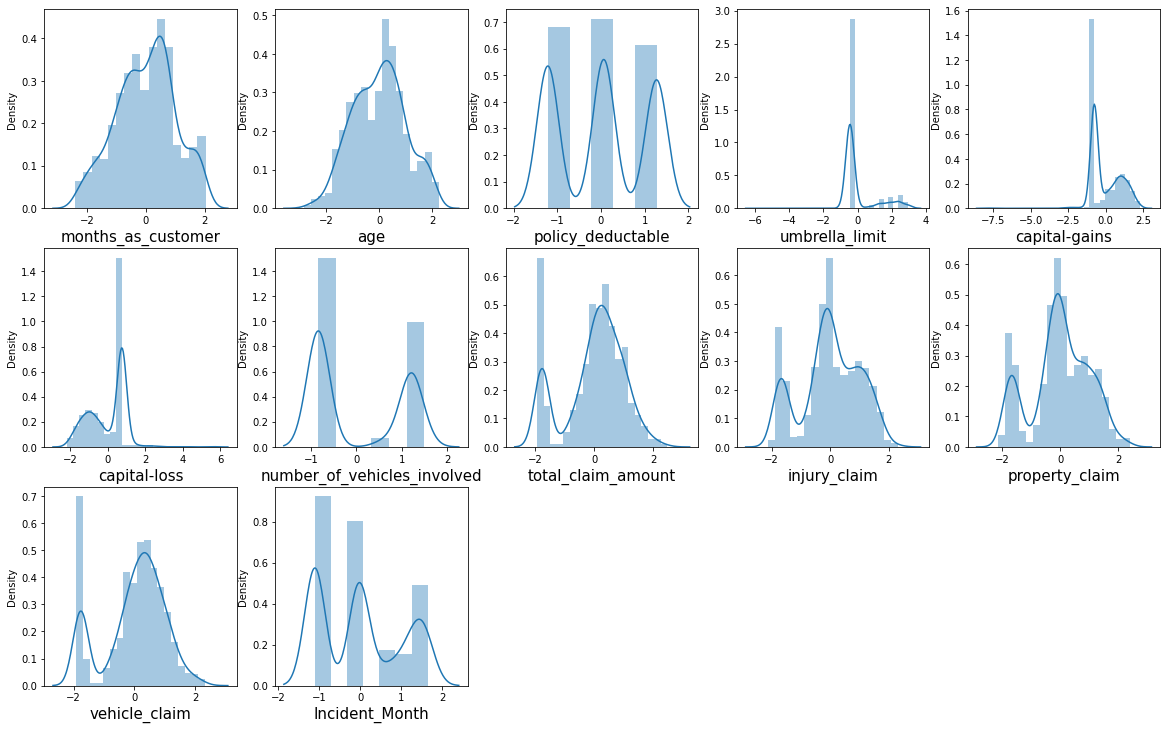

In [159]:
#checking skewness after removal through data visualization using distplot
columns=['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 'number_of_vehicles_involved', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',  'Incident_Month']

plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in fraud_detection[columns]:
    if plotnumber<=35:
        ax = plt.subplot(7,5,plotnumber)
        sns.distplot(fraud_detection[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

# Data Preprocessing

In [160]:
# Spliting data into Target and Features:
x=fraud_detection.drop("fraud_reported",axis=1)
y=fraud_detection["fraud_reported"]

In [161]:
x.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'Incident_Month'],
      dtype='object')

In [162]:
x.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Incident_Month
0,1.041996,1.000805,2,1,0.063749,1406.91,-0.449266,1,4,2,...,2,1,0.722144,-0.092989,1.120326,0.759575,10,1,2004,-1.103235
1,0.298095,0.426980,1,1,1.273647,1197.22,1.818253,1,4,6,...,0,2,-1.775394,-1.641224,-1.649355,-1.784536,8,12,2007,-1.103235
2,-0.515153,-1.133360,2,0,1.273647,1413.14,1.818253,0,6,11,...,3,0,-0.711033,0.145358,-0.679337,-0.814721,4,30,2007,-0.019972
3,0.516118,0.324046,0,1,1.273647,1415.74,2.371309,0,6,1,...,2,0,0.397987,-0.128244,-0.107227,0.683595,3,34,2014,1.560775
4,0.298095,0.626232,0,2,0.063749,1583.91,2.371309,1,0,11,...,1,0,-1.727850,-1.435839,-1.709177,-1.737543,0,31,2009,-0.019972


In [163]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int32

In [164]:
x.shape, y.shape

((970, 34), (970,))

In [165]:
y.value_counts()

0    733
1    237
Name: fraud_reported, dtype: int64

**The data is not balanced. So, we will use oversampling method to balance it.**

In [166]:
#Oversampling using the SMOTE

In [167]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [168]:
Smote = SMOTE()
x, y = Smote.fit_resample(x,y)


In [169]:
y.value_counts()

1    733
0    733
Name: fraud_reported, dtype: int64

In [170]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [171]:
# Checking for Multicolinearity using VIF (Variance Inflation factor)

In [172]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,5.287294,months_as_customer
1,5.321299,age
2,1.056235,policy_state
3,1.071708,policy_csl
4,1.059213,policy_deductable
5,1.046281,policy_annual_premium
6,1.029717,umbrella_limit
7,1.050400,insured_sex
8,1.051665,insured_education_level
9,1.042125,insured_occupation


**The VIF value is more than 10 in the columns 'total_claim_amount' and 'vehicle_claim'. But column 'total_claim_amount' is having highest VIF value. So, we will drop column 'total_claim_amount'.**

In [173]:
x.drop('total_claim_amount', axis =1, inplace=True)

In [174]:
# To verify:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,5.284872,months_as_customer
1,5.310598,age
2,1.051237,policy_state
3,1.071521,policy_csl
4,1.048053,policy_deductable
5,1.046208,policy_annual_premium
6,1.029520,umbrella_limit
7,1.050134,insured_sex
8,1.051289,insured_education_level
9,1.041322,insured_occupation


**Great ,Multicolinearity is removed from the columns as VIF value of all columns are less than 10. So, we will create model now.**

In [175]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=51)

In [176]:
x.shape, y.shape

((1466, 33), (1466,))

In [177]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((1026, 33), (1026,), (440, 33), (440,))

**Logistic Regression:**

In [179]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_lr))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_lr))
print("classification_report: \n", classification_report(y_test,pred_lr))

accuracy_score:  0.8136363636363636
confusion_matrix: 
 [[172  40]
 [ 42 186]]
classification_report: 
               precision    recall  f1-score   support

           0       0.80      0.81      0.81       212
           1       0.82      0.82      0.82       228

    accuracy                           0.81       440
   macro avg       0.81      0.81      0.81       440
weighted avg       0.81      0.81      0.81       440



**Random Forest Classifier:**

In [180]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_rfc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_rfc))
print("classification_report: \n",classification_report(y_test,pred_rfc))

accuracy_score:  0.8772727272727273
confusion_matrix: 
 [[187  25]
 [ 29 199]]
classification_report: 
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       212
           1       0.89      0.87      0.88       228

    accuracy                           0.88       440
   macro avg       0.88      0.88      0.88       440
weighted avg       0.88      0.88      0.88       440



**Decision Tree Classifier:**

In [181]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_dtc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_dtc))
print("classification_report: \n",classification_report(y_test,pred_dtc))

accuracy_score:  0.8477272727272728
confusion_matrix: 
 [[179  33]
 [ 34 194]]
classification_report: 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       212
           1       0.85      0.85      0.85       228

    accuracy                           0.85       440
   macro avg       0.85      0.85      0.85       440
weighted avg       0.85      0.85      0.85       440



**XGB Classifier:**

In [182]:
XGBC= XGBClassifier()
XGBC.fit(x_train,y_train)
pred_XGBC = XGBC.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_XGBC))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_XGBC))
print("classification_report: \n",classification_report(y_test,pred_XGBC))

accuracy_score:  0.9090909090909091
confusion_matrix: 
 [[190  22]
 [ 18 210]]
classification_report: 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       212
           1       0.91      0.92      0.91       228

    accuracy                           0.91       440
   macro avg       0.91      0.91      0.91       440
weighted avg       0.91      0.91      0.91       440



In [183]:
#Cross Validation Score for all the model

In [184]:
#CV Score for Logistic Regression
print('CV score for Logistic Regression: ',cross_val_score(lr,x,y,cv=5).mean())

#CV Score for Random Forest Classifier
print('CV score for Random forest Classifier: ',cross_val_score(rfc,x,y,cv=5).mean())

#CV Score for Decision Tree Classifier
print('CV score for Decision Tree Classifier: ',cross_val_score(dtc,x,y,cv=5).mean())

#CV Score for XGB Classifier
print('CV score for XGB Classifier: ',cross_val_score(XGBC,x,y,cv=5).mean())

CV score for Logistic Regression:  0.7974832253720601
CV score for Random forest Classifier:  0.8766269647790856
CV score for Decision Tree Classifier:  0.8165470966543614
CV score for XGB Classifier:  0.8827401267674304


# Hyper parameter tuning 

In [185]:
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

In [186]:
from sklearn.model_selection import KFold

In [187]:
CV_XGB = GridSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')

In [189]:
CV_XGB.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                        

In [190]:
print('Best score:', CV_XGB.best_score_)
print('Best score:', CV_XGB.best_params_)

Best score: 0.9413576263884046
Best score: {'base_score': 0.2, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 1}


In [191]:
Insurance_Fraud_Detection = XGBClassifier()
Insurance_Fraud_Detection.fit(x_train, y_train)
pred = Insurance_Fraud_Detection.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,pred))
print("confusion_matrix: \n",confusion_matrix(y_test,pred))
print("classification_report: \n",classification_report(y_test,pred))

accuracy score:  0.9090909090909091
confusion_matrix: 
 [[190  22]
 [ 18 210]]
classification_report: 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       212
           1       0.91      0.92      0.91       228

    accuracy                           0.91       440
   macro avg       0.91      0.91      0.91       440
weighted avg       0.91      0.91      0.91       440



In [192]:
#Saving the Model
import pickle
filename='Insurance_Fraud_Detection.pickle'
pickle.dump(CV_XGB,open(filename,'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,

In [193]:
#Checking predicted and original values
a =np.array(y_test)
predicted=np.array(CV_XGB.predict(x_test))
Insurance_Fraud_Detection=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
Insurance_Fraud_Detection

,Orginal,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
435,0,0
436,1,1
437,1,1
438,0,0


**As we can see, predicted and original values matches approx 100%. So , we achieved a good accuarcy**

In [194]:
model =Insurance_Fraud_Detection.to_csv('Insurance_Fraud_Detection.csv')
model